<a href="https://colab.research.google.com/github/cvalencia15/Algoritmos-de-Optimizacion/blob/main/Carolina_Valencia_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ALGORITMOS DE OPTIMIZACION - ACTIVIDAD GUIADA 2 (AG2)**

Carolina Valencia López

URL: https://colab.research.google.com/drive/1EUdBLtBheI0WPODu1KJkTb7NWOwqOY_b?usp=sharing

GitHub:



Programacion dinamica - viaje por el rio

In [8]:
#La programacion dinamica permite partir un problema en subsoluciones
#es decir, dividirlo en soluciones mas pequenas que para resolverlo
#en estas funciones se utiliza el concepto de recurrencia, asi como division de los problemas


def importe(tarifas):
  #total de nodos
  n=len(tarifas[0])

  #Inicializ tabla de precios
  precios=[[9999]*n for i in [9999]*n]
  ruta=[[""]*n for i in [""]*n]

  for i in range(n-1):
    for j in range(i+1,n):
      minim=tarifas[i][j]
      ruta[i][j]=i

      for k in range(i,j):
        if (precios[i][k]+tarifas[k][j]<minim):
          minim=min(minim,precios[i][k]+tarifas[k][j])
          ruta[i][j]=k
        precios[i][j]=minim
    
    return precios, ruta


def calcular_ruta(ruta,desde,hasta):
  if (desde==hasta):
    return desde
  else:
    return str(calcular_ruta(ruta,desde,ruta[desde][hasta])) + ',' +str(ruta[desde][hasta])

ruta=[['',0,0,0,1,2,6],['','',1,1,1,3,4]]
calcular_ruta(ruta,0,4)
tarifas=[[0,5,4,3,999,999,999],[999,0,999,2,3,999,11],[999,999,0,1,999,4,10],[999,999,999,0,5,6,9],[999,999,999,999,0,999,4],[999,999,999,999,999,0,3],[999,999,999,999,999,999,0]]
importe(tarifas)

([[9999, 5, 4, 3, 8, 8, 11],
  [9999, 9999, 9999, 9999, 9999, 9999, 9999],
  [9999, 9999, 9999, 9999, 9999, 9999, 9999],
  [9999, 9999, 9999, 9999, 9999, 9999, 9999],
  [9999, 9999, 9999, 9999, 9999, 9999, 9999],
  [9999, 9999, 9999, 9999, 9999, 9999, 9999],
  [9999, 9999, 9999, 9999, 9999, 9999, 9999]],
 [['', 0, 0, 0, 1, 2, 5],
  ['', '', '', '', '', '', ''],
  ['', '', '', '', '', '', ''],
  ['', '', '', '', '', '', ''],
  ['', '', '', '', '', '', ''],
  ['', '', '', '', '', '', ''],
  ['', '', '', '', '', '', '']])

Busqueda en grafos, ramificacion y poda - asignacion de tareas

In [23]:
#FUERZA BRUTA
#El algoritmo de asignacion de tareas tiene, por fuerza bruta, una complejidad de O(n!)
#Esto se debe a que la solucion se basa en una permutacion de las n tareas
import itertools
from itertools import permutations

def valor(s,costes):
  val=0
  for i in range(len(s)):
    val+=costes[i][s[i]]
  
  return val


def fuerza_bruta(costes):
  mejor_valor=10e10
  mejor_solucion=()

  for s in list(itertools.permutations(range(len(costes)))):
    valor_tmp=valor(s,costes)
    if (valor_tmp<mejor_valor):
      mejor_valor=valor_tmp
      mejor_solucion=s
  
  print("La mejor solucion es:", mejor_solucion,"con valor:", mejor_valor)

costes=[[11,12,18,40],[14,15,13,22],[11,17,19,23],[17,14,20,28]]
valor((0,1,2,3),costes)
fuerza_bruta(costes)

#generamos matrices con vals aleatorios de mayores dimensiones
#el algoritmo de fuerza bruta deja de ser opcion cuando se sobrepasa el tiempo lineal de ejecucion. En este caso, a partir de 10-12




La mejor solucion es: (0, 2, 3, 1) con valor: 61


In [34]:
#RAMIFICACION Y PODA
#los algoritmos b&b son time-consuming, y muy difíciles de paralelizar

#genera tantos hijos como posibilidades para next.elem de la tupla
def crear_hijos(nodo,n):
  hijos=[]
  for i in range(n):
    if(i not in nodo):
      hijos.append({'s':nodo+(i,)})
  return hijos


def CI(s,costes):
  valor=0
  for i in range(len(s)):
    valor+=costes[i][s[i]]

  for i in range(len(s), len(costes)):
    valor+=min([costes[j][i] for j in range(len(s), len(costes))])
  return valor



def ramificacion_y_poda(costes):
  #Construccion iterat de soluciones->cada etapa, 1 agente
  #nodos: {s: (1,2), CI:3,CS:5}

  dimension=len(costes)
  mejor_solucion=tuple(i for i in range(len (costes)))
  cotasup=valor(mejor_solucion,costes)

  nodos=[]
  nodos.append({'s':(), 'ci':CI((),costes)})
  iteracion=0

  while(len(nodos)>0):
    iteracion+=1
    nodo_prometedor=[min(nodos,key=lambda x:x['ci'])][0]['s']

    #branching y generacion de hijos
    hijos=[{'s':x['s'], 'ci':CI(x['s'], costes)} for x in crear_hijos(nodo_prometedor, dimension)]

    #revisamos cota superior y se elige la mejor solucion si es final
    nodo_final=[x for x in hijos if len(x['s'])==dimension]
    if (len(nodo_final)>0):
        if (nodo_final[0]['ci']<cotasup):
          cotasup=nodo_final[0]['ci']
          mejor_solucion=nodo_final
        
    #poda
    hijos=[x for x in hijos if x['ci']<cotasup]

    #se anaden los hijos
    nodos.extend(hijos)

    #se elimina nodo ramific
    nodos=[x for x in nodos if x['s']!=nodo_prometedor]
  print("La solucion final es:", mejor_solucion, "en", iteracion, "iteraciones para la dimension", dimension)


#invocacion y test
costes=[[11,12,18,40],[14,15,13,22],[11,17,19,23],[17,14,20,28]]
crear_hijos((2,0),2)
CI((2,3),costes)
ramificacion_y_poda(costes)

#Dejan de ser una opcion valida cuando hay mucha profundidad o anchura, y dado a que consumen mucho tiempo y espacio,  esto es, complejidad exponencial en tiempo y espacio(memoria), no seria una buena opcion
#otro problema es las cotas necesitan estar bien definidas y calcularse en un tiempo que no sea muy time-consuming
#cuanto mas tiempo se tarde, se calculan mejores cotas; cuanto menos tiempo, menos se poda


La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}] en 10 iteraciones para la dimension 4


Descenso de gradiente

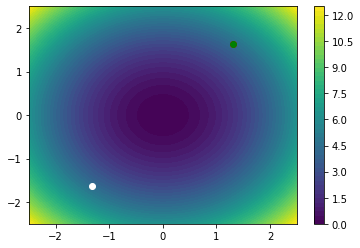

Solucion: [1.318401512966556, 1.6284315666431755] 4.389971916632451


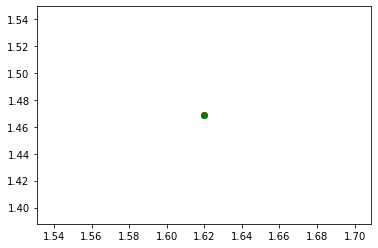

Solucion: [1.619835771266014, 1.468673029586274] -0.5868506101340771


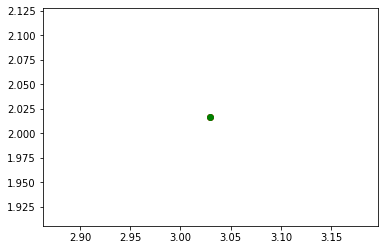

Solucion: [3.029800920066177, 2.0165024410317294] 0.25726358100007574


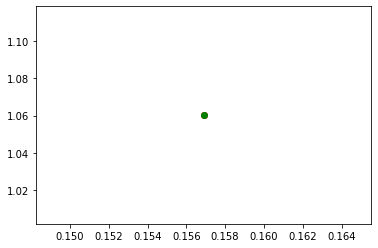

Solucion: [0.15690333516312682, 1.060244230385247] -0.0009864762920369211


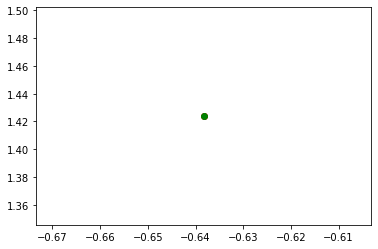

Solucion: [-0.6382501839594868, 1.4237652162549677] -0.12018810386498115


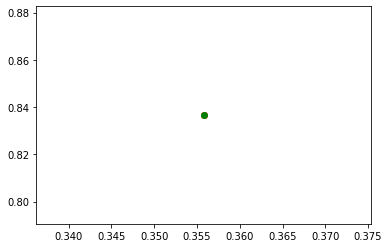

Solucion: [0.35578668061226293, 0.8366318495919947] 0.20724302182797694


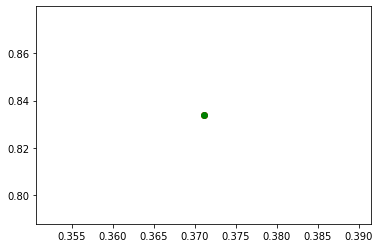

Solucion: [0.3710675373831708, 0.8338869204617257] 0.20679795731030037


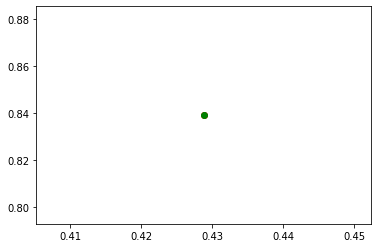

Solucion: [0.42877567081721313, 0.8391198110218592] 0.2008445074625365


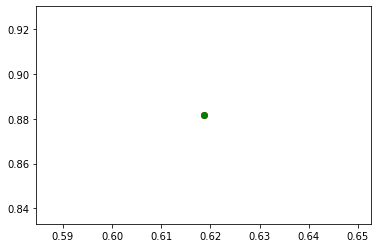

Solucion: [0.6186723224159608, 0.8816294015568429] 0.14176722399753278


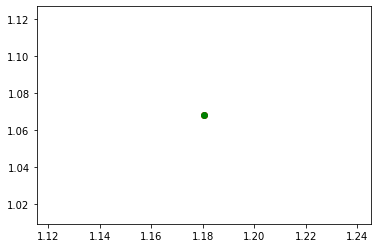

Solucion: [1.18045671389112, 1.0681756629424213] -0.2399893809647759


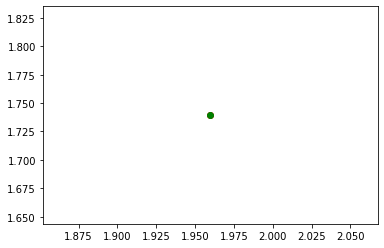

Solucion: [1.959835564758405, 1.7394488122935998] -0.6099624221716587


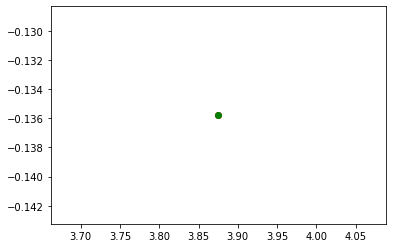

Solucion: [3.875429017982412, -0.135778048049227] 0.021024889546486417


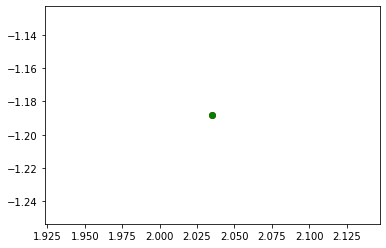

Solucion: [2.035257032540385, -1.1882283995817842] -0.053338170465491594


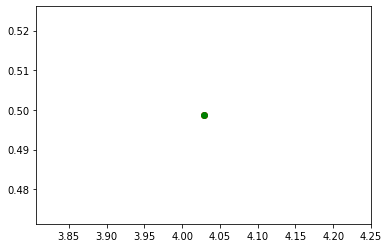

Solucion: [4.028787714400057, 0.4986967393047461] -0.4279176723484523


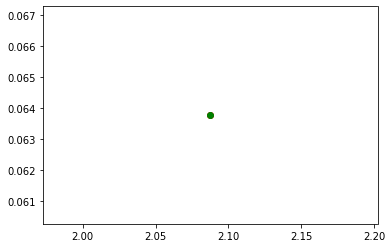

Solucion: [2.0874250872852502, 0.06376989342316808] 0.5071167912861342


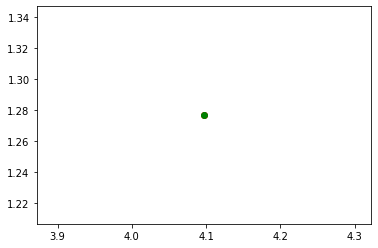

Solucion: [4.09712530285043, 1.2768673833093405] -0.7810897799641111


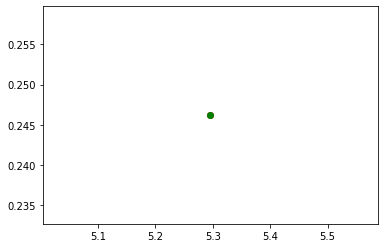

Solucion: [5.295742171286383, 0.24620007915594178] 0.608193047764771


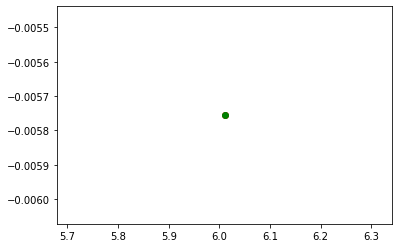

Solucion: [6.010661710794436, -0.005755408397637218] 0.6863660811944509


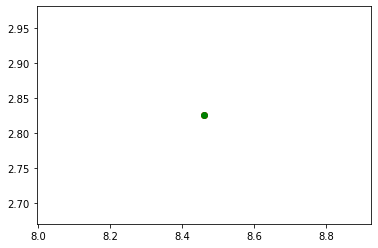

Solucion: [8.460837547146921, 2.825995922836652] -0.39474854352969513


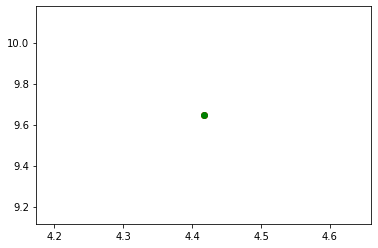

Solucion: [4.4167837020573035, 9.646570779491823] -0.5076953185434273


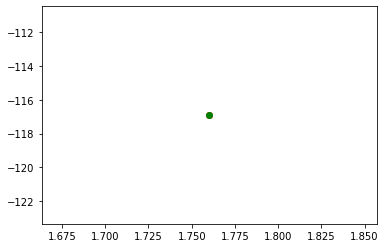

Solucion: [1.760068929648884, -116.9103452023088] 0.12142507091024274


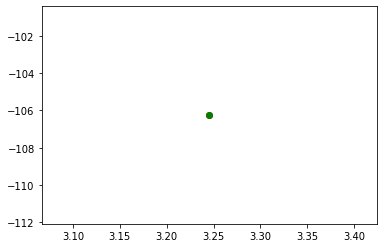

Solucion: [3.245275622705549, -106.24831981959933] 0.2905050061792432


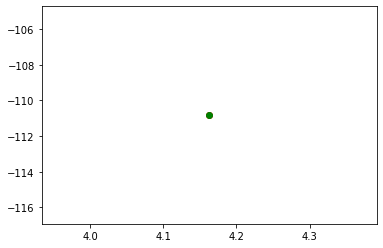

Solucion: [4.162538949013564, -110.82677474821206] -0.7982987040247127


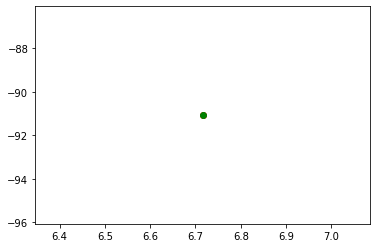

Solucion: [6.716005770871128, -91.0701321435207] -0.12075180972375438


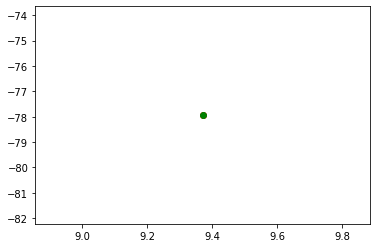

Solucion: [9.371360382421306, -77.93711216305192] -0.6145774540353358


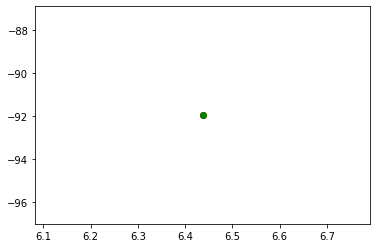

Solucion: [6.4372979231501475, -91.95922498570982] 0.2460137897645022


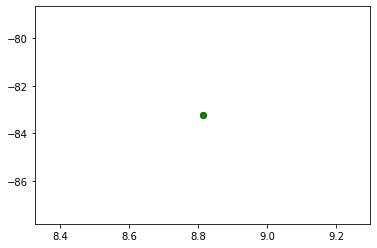

Solucion: [8.813048460967964, -83.23327363522202] 0.06557640597758353


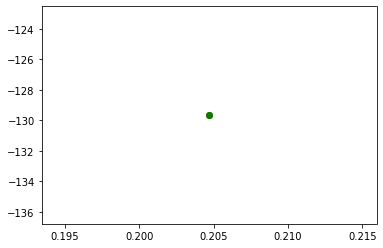

Solucion: [0.20469588274509398, -129.65935978040307] -0.06887667405609363


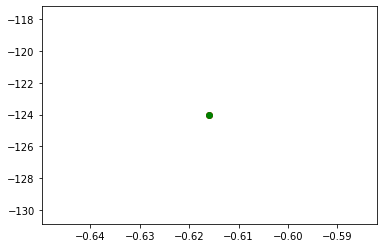

Solucion: [-0.6159792249178241, -124.03000240598067] 0.46901240993184123


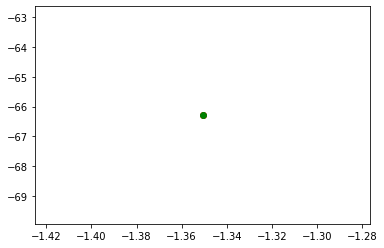

Solucion: [-1.3506417465709917, -66.28277246722335] 0.11955638854872623


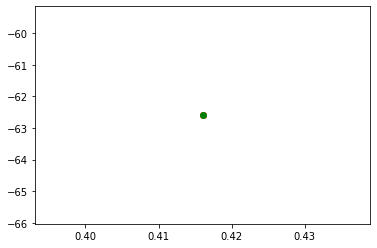

Solucion: [0.4160425775939909, -62.59045137190536] 0.17240634167654245


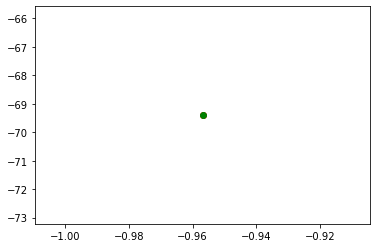

Solucion: [-0.956790309811743, -69.39918943997374] -0.3012988548315018


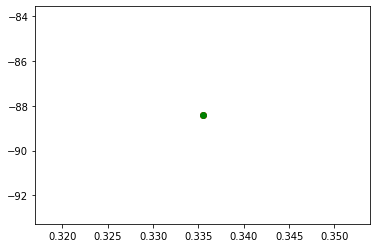

Solucion: [0.33547640670168644, -88.41524965256468] -0.03228560342562498


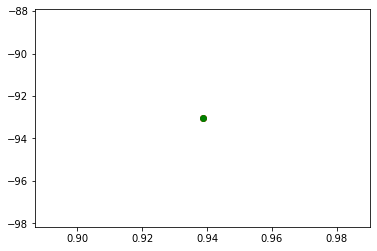

Solucion: [0.9386855065503994, -93.03917389126119] -0.6818456461922077


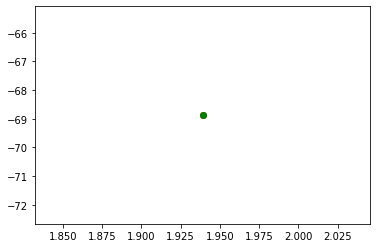

Solucion: [1.9390748028089297, -68.87119103953077] 0.050116126276454565


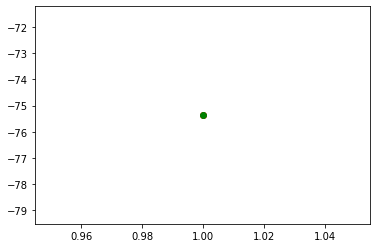

Solucion: [0.9999696200402173, -75.36319199604702] 0.43557581852183375


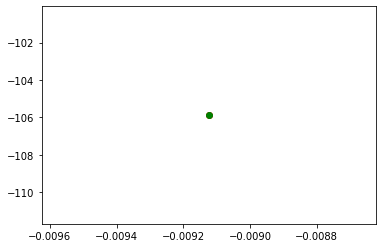

Solucion: [-0.009123212805825176, -105.87970351466382] 0.2510173843666774


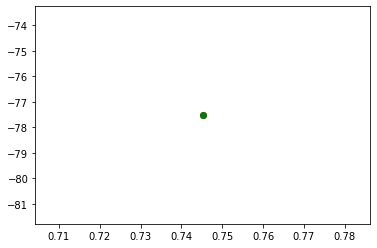

Solucion: [0.7452225849974851, -77.51875719069902] -0.3616772114083437


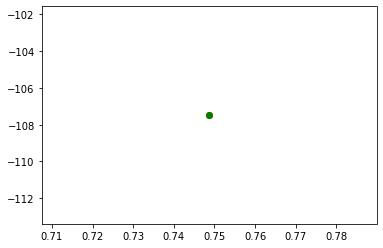

Solucion: [0.7486808062738385, -107.4773074078354] 0.4385698207177027


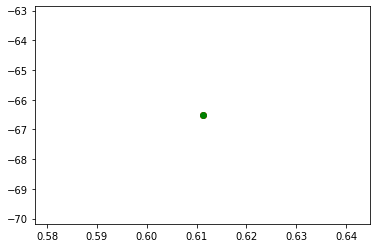

Solucion: [0.611239028460037, -66.51532612873865] -0.11235759740725121


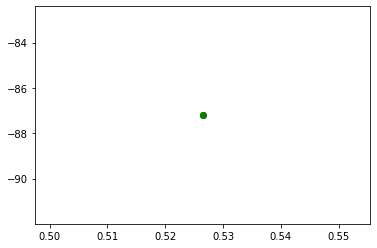

Solucion: [0.5264745673477015, -87.19767305926149] 0.0912097266986405


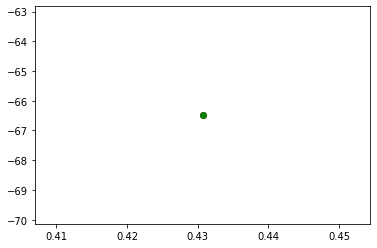

Solucion: [0.430701738529771, -66.4823756514725] 0.208558454675131


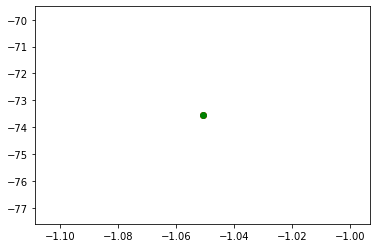

Solucion: [-1.0508316661025692, -73.54823716653902] 0.39000163572921537


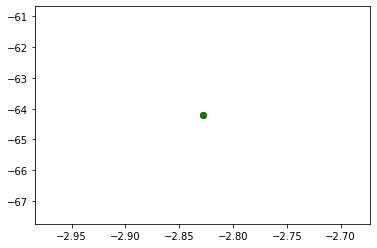

Solucion: [-2.828127449448192, -64.2081727207467] -0.026205882538545933


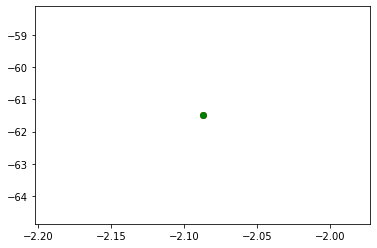

Solucion: [-2.0872614396091027, -61.48617395684712] -0.5830469485804819


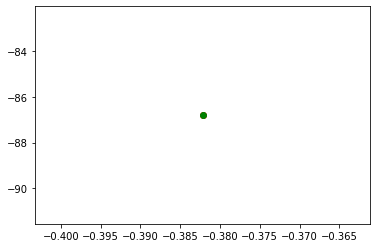

Solucion: [-0.38218328924013667, -86.79584084642644] -0.9704215714790465


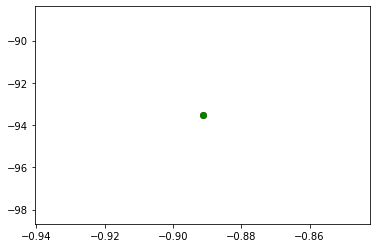

Solucion: [-0.8913011964389672, -93.52770527703888] 0.0381375459328842


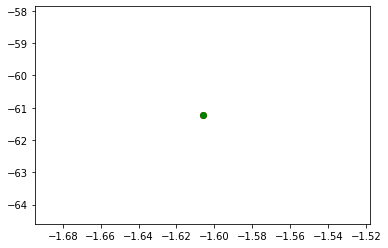

Solucion: [-1.6061263714679503, -61.22877255307753] 0.06104152911431899


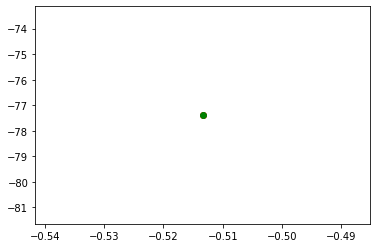

Solucion: [-0.5133778543673841, -77.3837195590881] 0.9945549994691084


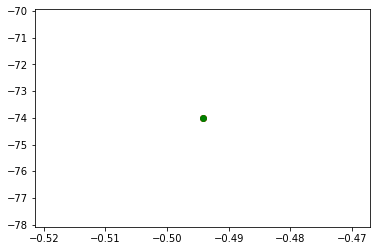

Solucion: [-0.49420987939954664, -74.00716416484539] -0.43479147677756436


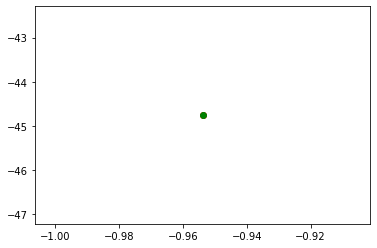

Solucion: [-0.9538156749878992, -44.7529300401042] -0.47434642173809544


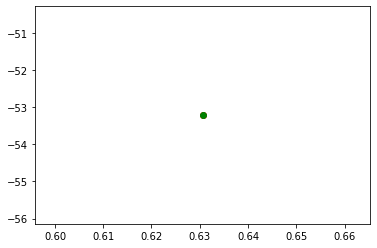

Solucion: [0.6306138771701406, -53.21510583756511] 0.5512533809248342


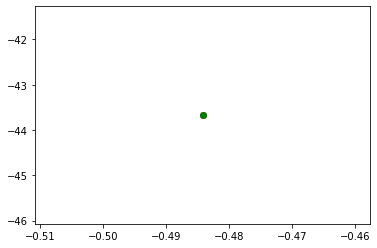

Solucion: [-0.4841976668855643, -43.67003731719497] -0.6662941867658797


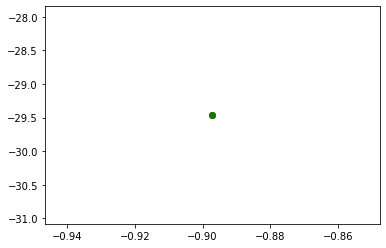

Solucion: [-0.8971276544769904, -29.46262674733461] 0.013402814488600015


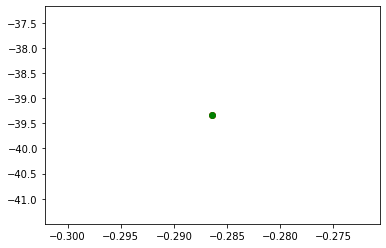

Solucion: [-0.28639376830951335, -39.335661268040774] -0.44290918513415595


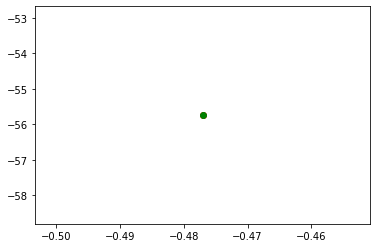

Solucion: [-0.4770190811577827, -55.74254167860954] -0.7584559253758774


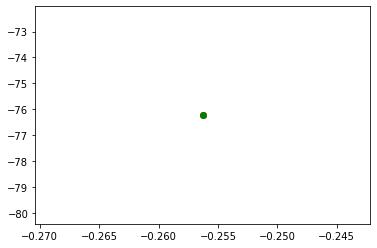

Solucion: [-0.2562800708275096, -76.22200072769041] 0.8032867289099024


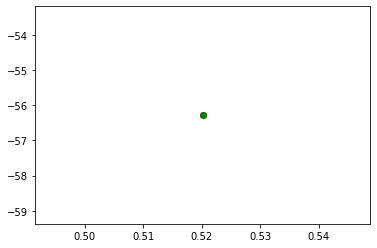

Solucion: [0.5201784484444957, -56.276782612705276] -0.04247927812690937


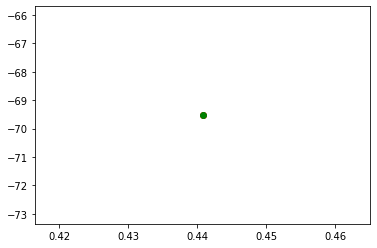

Solucion: [0.44082435528206765, -69.52534167882547] -0.2615043832216335


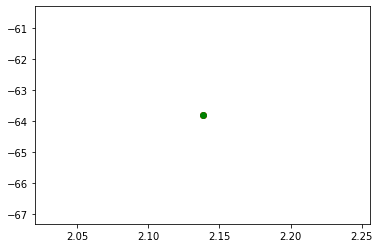

Solucion: [2.1382854340836444, -63.79572453342786] -0.2995630398138684


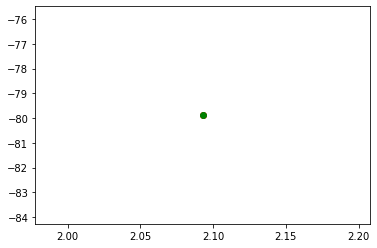

Solucion: [2.0928583304667203, -79.87954744554254] -0.15614501285981253


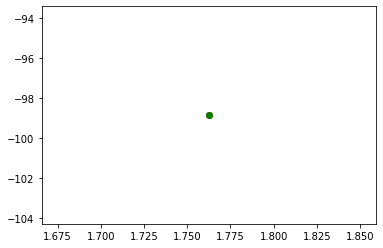

Solucion: [1.7625847062642803, -98.841073264581] -0.00740789845599236


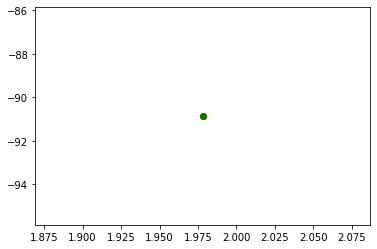

Solucion: [1.9780798805449924, -90.85854746012255] 0.21718032478746063


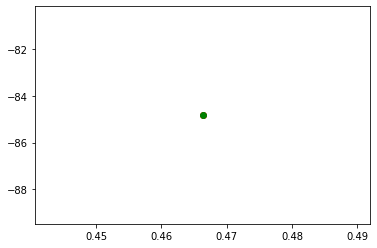

Solucion: [0.46631013473820215, -84.81981387552685] -0.35308173011410354


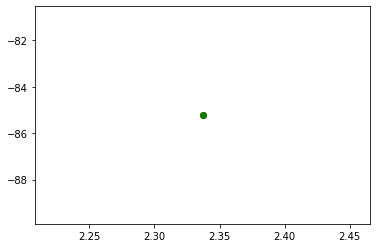

Solucion: [2.3369745859820554, -85.22254671930345] -0.34374983815202886


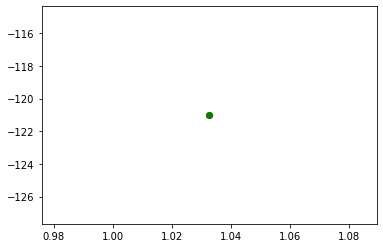

Solucion: [1.032662754573128, -121.00943073955293] 0.45471127082041296


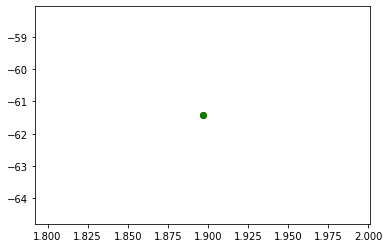

Solucion: [1.8967199245160558, -61.42203709687229] -0.06670737643190187


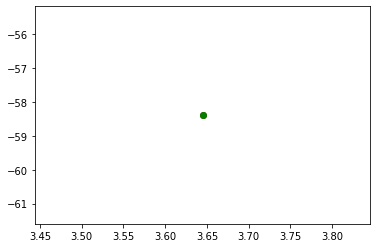

Solucion: [3.64493812096176, -58.38771033972389] 0.26926787489720394


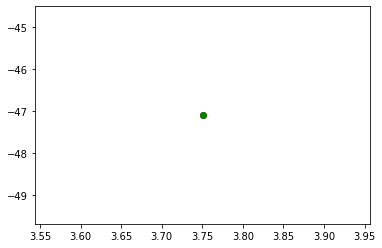

Solucion: [3.7503606870480652, -47.10001021242904] -0.5299180642863554


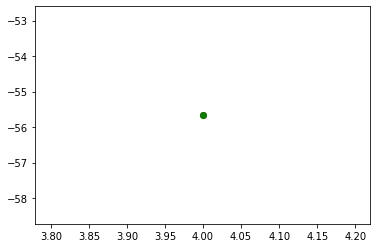

Solucion: [3.9995582402768513, -55.66053614994457] -0.10773957673172738


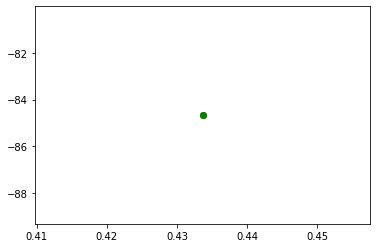

Solucion: [0.4336349598314291, -84.66654563938965] -0.2898682662512534


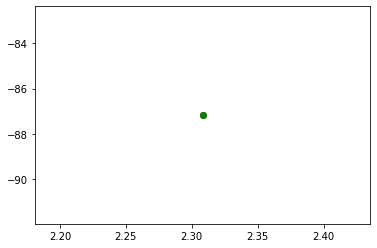

Solucion: [2.3081982591133965, -87.16604965489124] -0.420209335268511


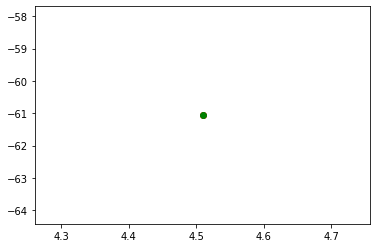

Solucion: [4.509520191699733, -61.05582839691576] 0.8215495576689987


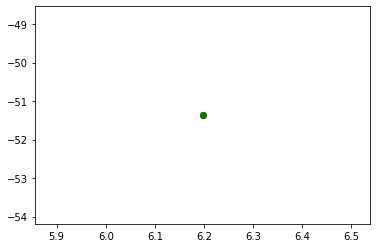

Solucion: [6.197546681929888, -51.36365948050587] -0.25801425445692083


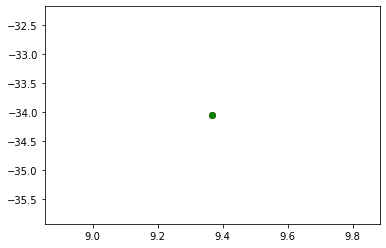

Solucion: [9.36767208854019, -34.05552745452085] 0.581413911283892


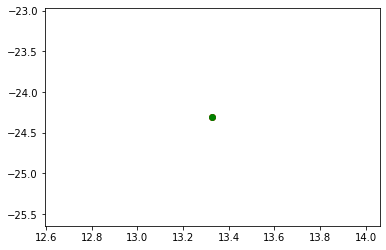

Solucion: [13.328687687965877, -24.30739338194575] -0.5021960194837854


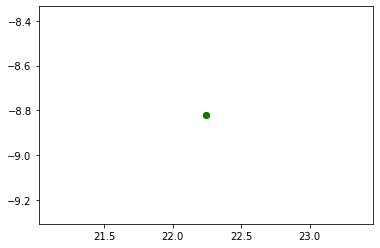

Solucion: [22.242812133948405, -8.82058596953501] -0.06755910843763445


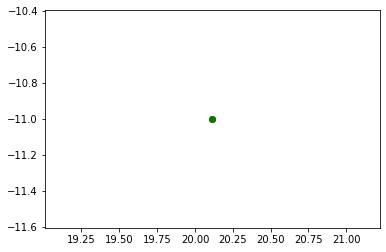

Solucion: [20.11476120331369, -11.002045605738562] 0.7182765103814552


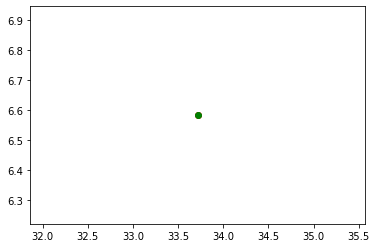

Solucion: [33.71569294672223, 6.5844155096900785] -0.2633248493369757


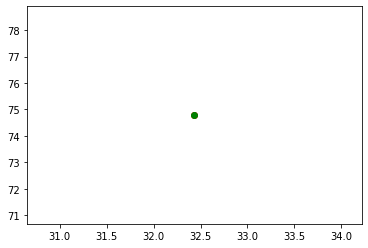

Solucion: [32.43386299047464, 74.78503423589663] -0.8396624044018028


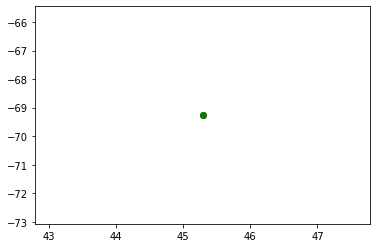

Solucion: [45.293043826247626, -69.26057877722246] 0.6842587649223687


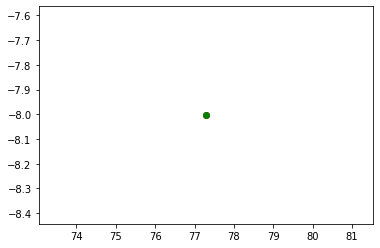

Solucion: [77.28871841763451, -8.003263584622616] 0.06621733683130371


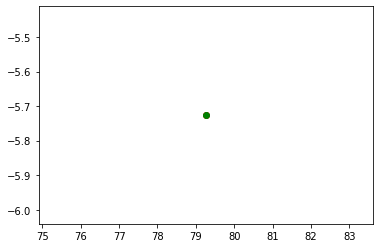

Solucion: [79.26262785825514, -5.7260056560293755] -0.5359752822658536


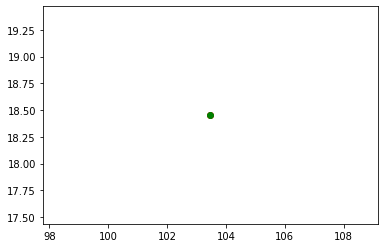

Solucion: [103.47058170471585, 18.453147882267594] 0.27322693490830646


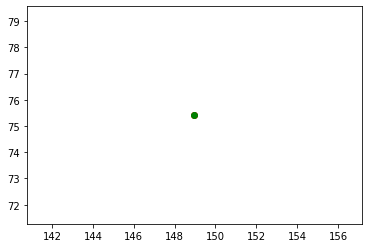

Solucion: [148.9682641565239, 75.41908474834071] -0.44097020671093495


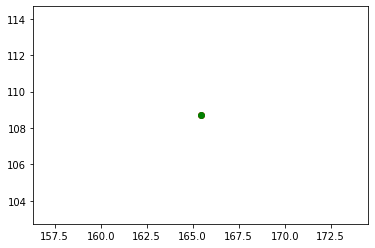

Solucion: [165.43725491641027, 108.70645693693207] 0.1652401557493307


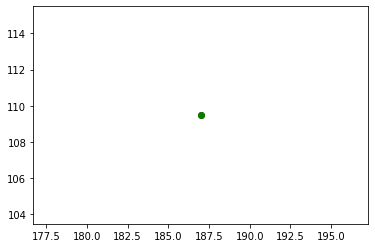

Solucion: [186.98758144849603, 109.47878728288454] -0.014493397857663232


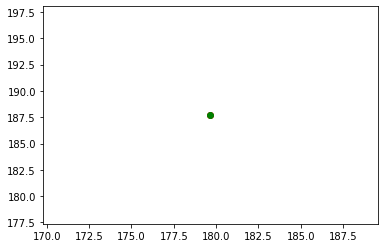

Solucion: [179.65816103068371, 187.69975209754642] 0.3155233055036277


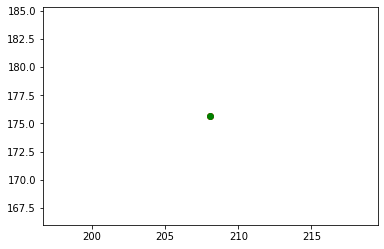

Solucion: [208.08948330929093, 175.65347883730743] 0.06862860554316817


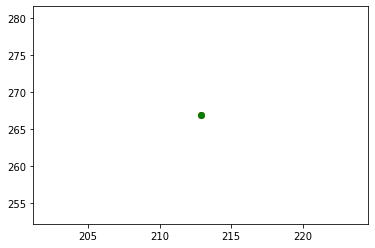

Solucion: [212.86758957662914, 266.87254225173257] 0.22176922376614192


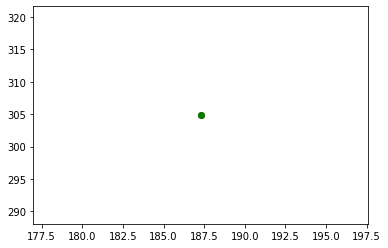

Solucion: [187.28416671218991, 304.8659467534116] 0.0691743406220138


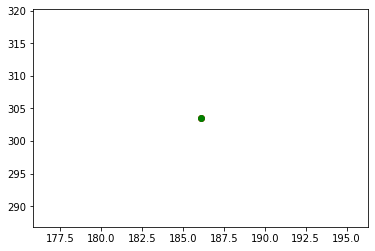

Solucion: [186.0834667721202, 303.5115172283021] 0.8959870769611346


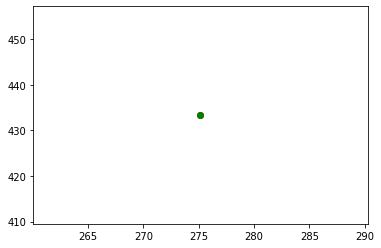

Solucion: [275.15384306966905, 433.36240398555236] -0.8015296993150715


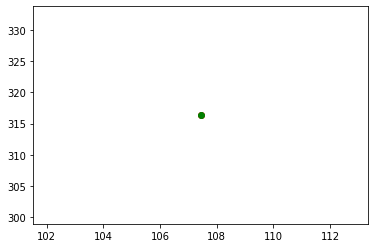

Solucion: [107.42896497211413, 316.35759420676453] 0.19341402505523073


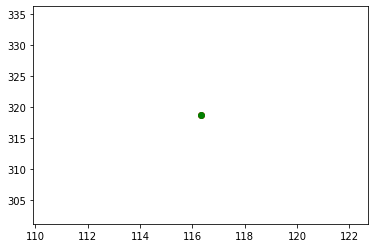

Solucion: [116.31065023619138, 318.6785024364427] -0.9848568626022427


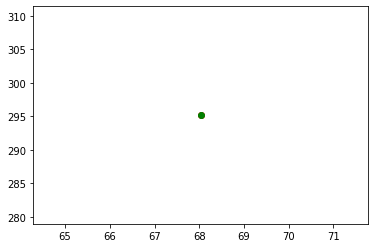

Solucion: [68.03235547214177, 295.20420736863775] -0.40138712227803003


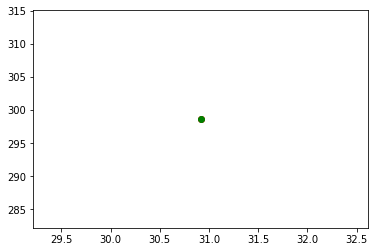

Solucion: [30.915857654959943, 298.6519329249644] 0.06008532832028013


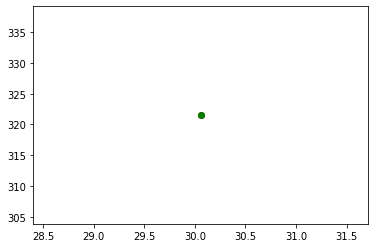

Solucion: [30.057156662389325, 321.52928588867076] -0.19086439249019918


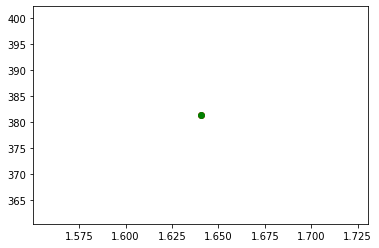

Solucion: [1.6404113766118087, 381.3572180518717] 0.13749116830975963


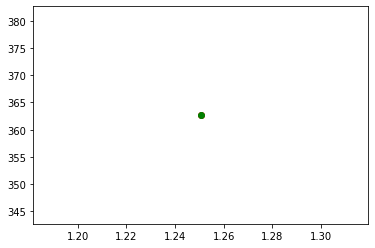

Solucion: [1.2505606693323543, 362.6788787355038] 0.2548957380833879


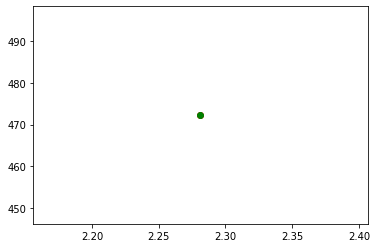

Solucion: [2.2812779146445834, 472.2630447185638] 0.3564252184220941


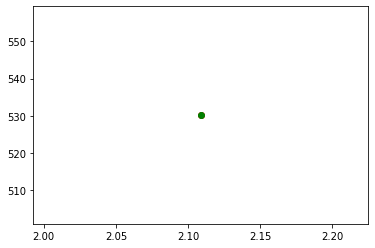

Solucion: [2.108631916395784, 530.2000687525818] -0.4203045948325866


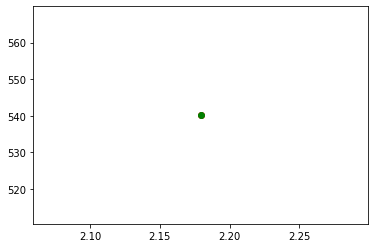

Solucion: [2.1792198001948955, 540.1770718019279] -0.29929356348708464


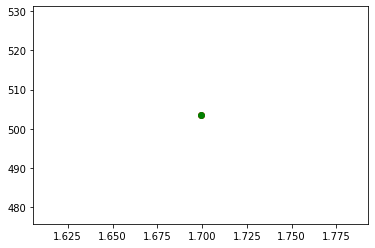

Solucion: [1.699172256099349, 503.4972744360508] 0.09141457306052733


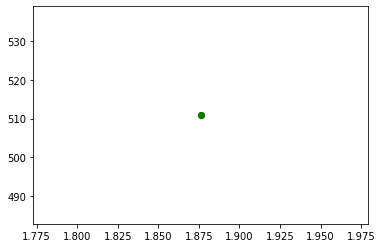

Solucion: [1.8760695085119268, 510.91313084133003] 0.010992044273828707


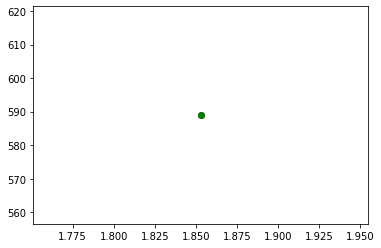

Solucion: [1.8528802550112604, 588.9788945396396] -0.506061539758677


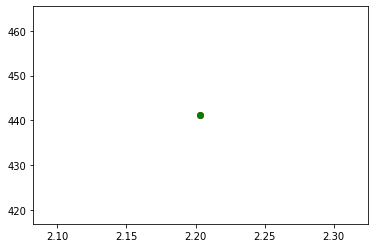

Solucion: [2.2035672397167, 441.2009790334304] 0.416125956461623


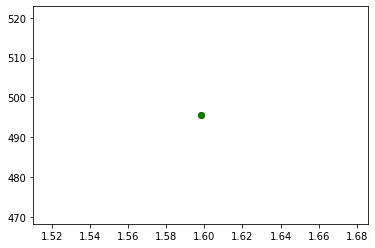

Solucion: [1.5980090014761388, 495.57826597784975] -0.5194888878030602


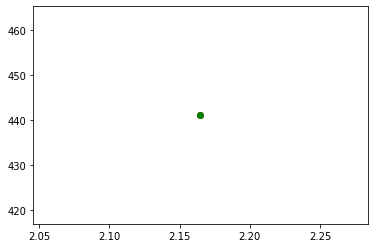

Solucion: [2.164915739956438, 441.1096048332763] 0.7920965325564724


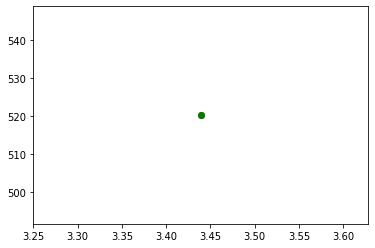

Solucion: [3.4388149543505744, 520.2671371693468] 0.0020604514270498218


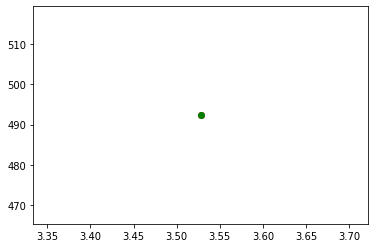

Solucion: [3.5276506279518407, 492.3768329827783] 0.7662329033730294


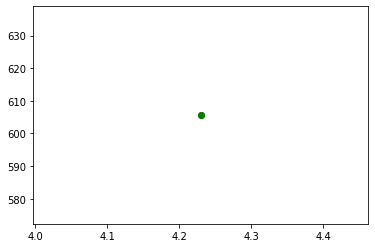

Solucion: [4.229804929132898, 605.6267136287887] -0.057679468832087216


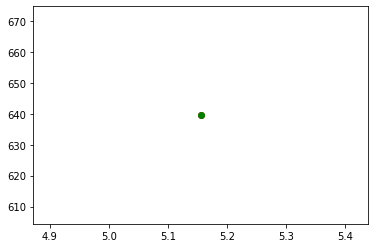

Solucion: [5.155429322523185, 639.5802578840403] -0.014211948373339904


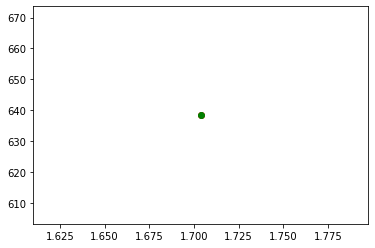

Solucion: [1.7037563407742922, 638.4854401183269] 0.5959210369317521


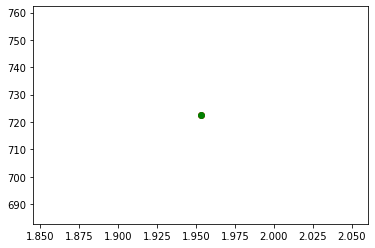

Solucion: [1.9529838486331212, 722.5251057636482] nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in cos


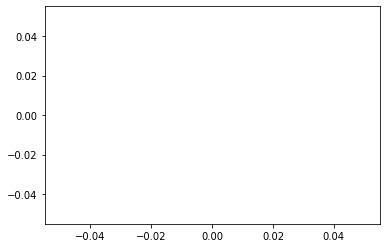

Solucion: [nan, nan] nan


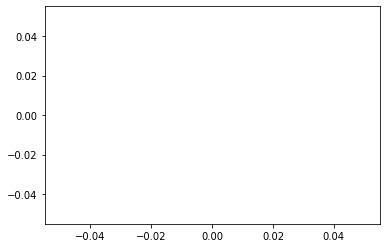

Solucion: [nan, nan] nan


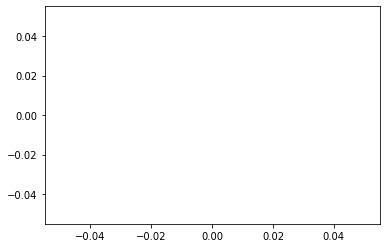

Solucion: [nan, nan] nan


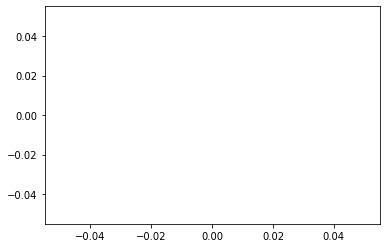

Solucion: [nan, nan] nan


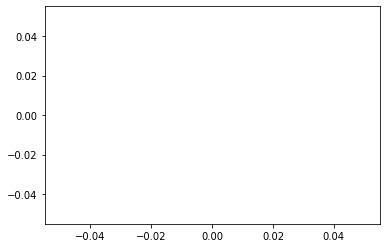

Solucion: [nan, nan] nan


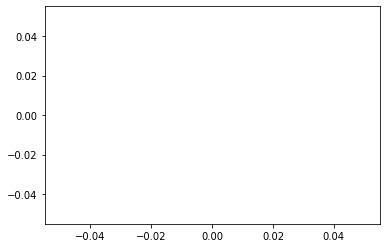

Solucion: [nan, nan] nan


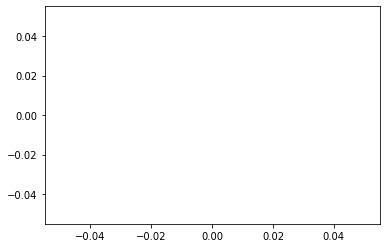

Solucion: [nan, nan] nan


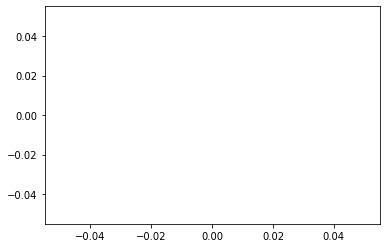

Solucion: [nan, nan] nan


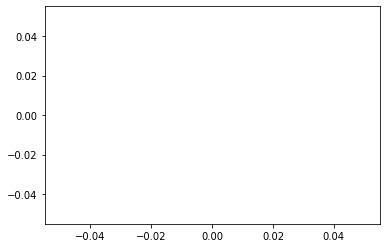

Solucion: [nan, nan] nan


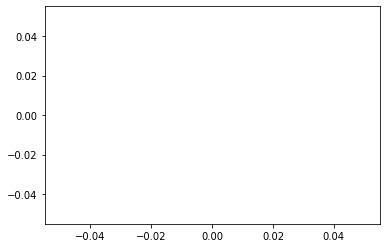

Solucion: [nan, nan] nan


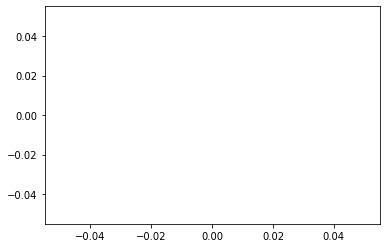

Solucion: [nan, nan] nan


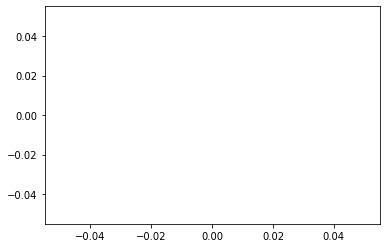

Solucion: [nan, nan] nan


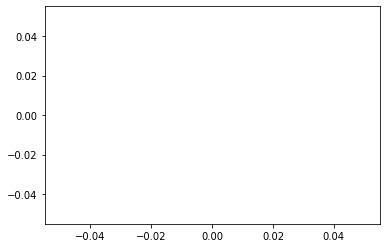

Solucion: [nan, nan] nan


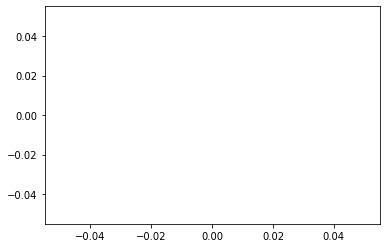

Solucion: [nan, nan] nan


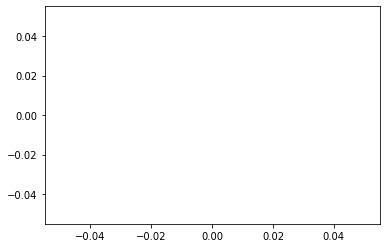

Solucion: [nan, nan] nan


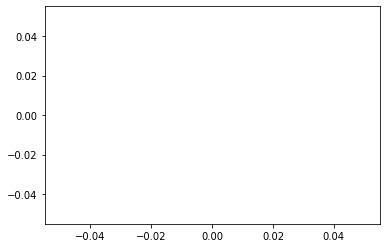

Solucion: [nan, nan] nan


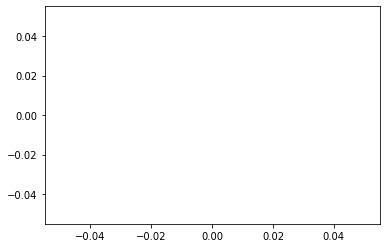

Solucion: [nan, nan] nan


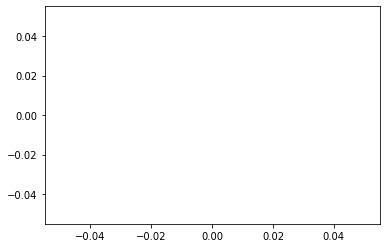

Solucion: [nan, nan] nan


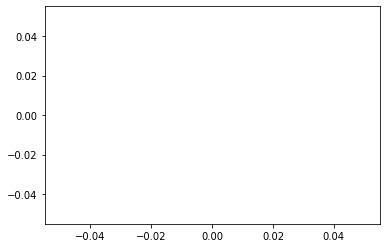

Solucion: [nan, nan] nan


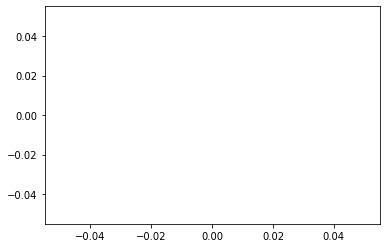

Solucion: [nan, nan] nan


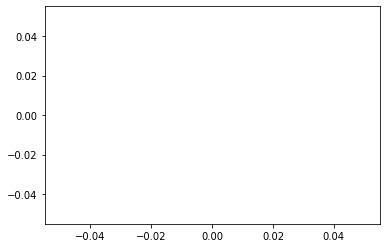

Solucion: [nan, nan] nan


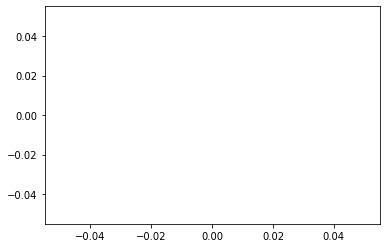

Solucion: [nan, nan] nan


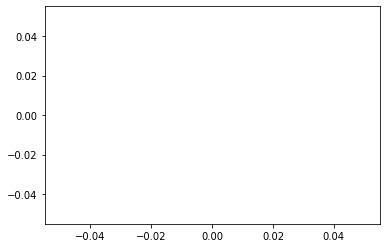

Solucion: [nan, nan] nan


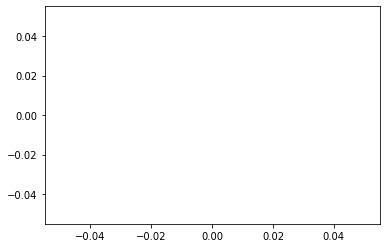

Solucion: [nan, nan] nan


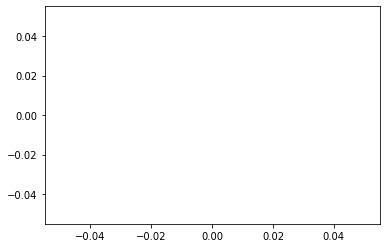

Solucion: [nan, nan] nan


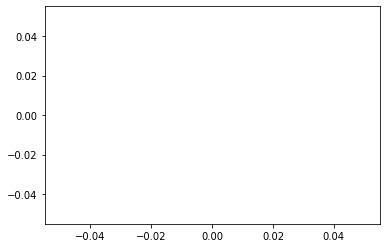

Solucion: [nan, nan] nan


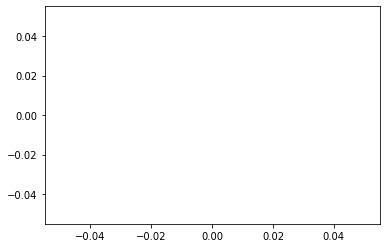

Solucion: [nan, nan] nan


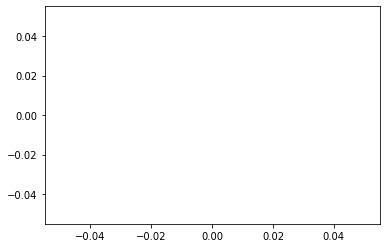

Solucion: [nan, nan] nan


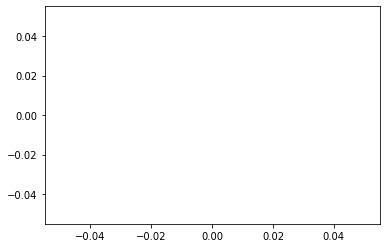

Solucion: [nan, nan] nan


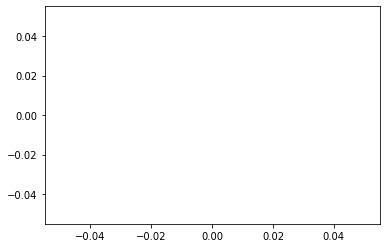

Solucion: [nan, nan] nan


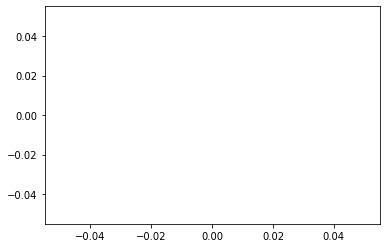

Solucion: [nan, nan] nan


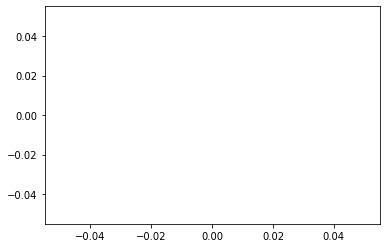

Solucion: [nan, nan] nan


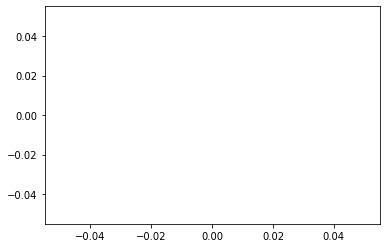

Solucion: [nan, nan] nan


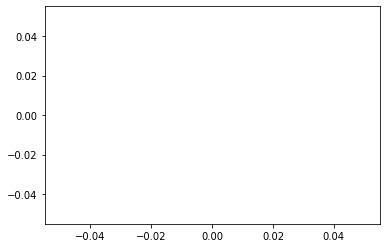

Solucion: [nan, nan] nan


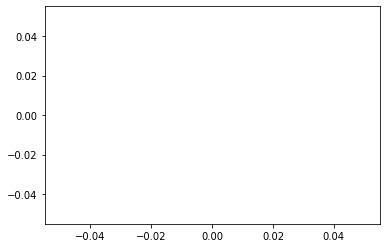

Solucion: [nan, nan] nan


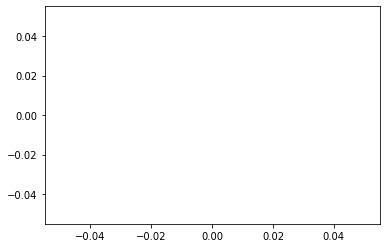

Solucion: [nan, nan] nan


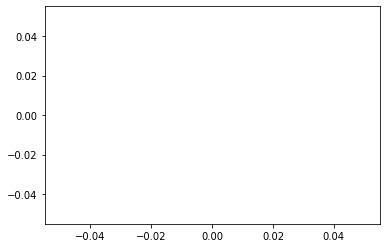

Solucion: [nan, nan] nan


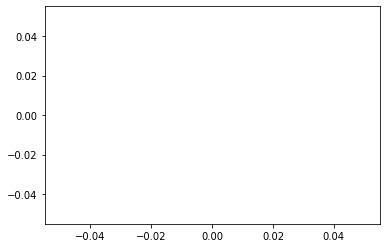

Solucion: [nan, nan] nan


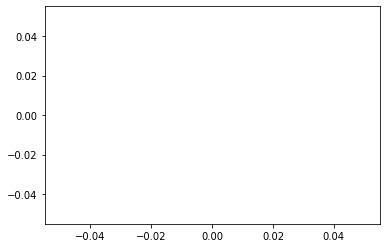

Solucion: [nan, nan] nan


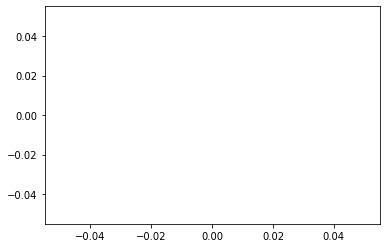

Solucion: [nan, nan] nan


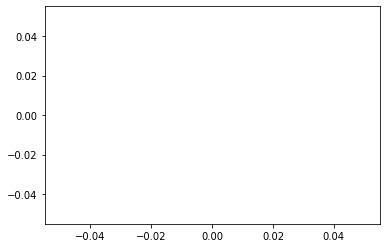

Solucion: [nan, nan] nan


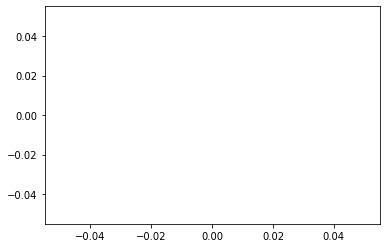

Solucion: [nan, nan] nan


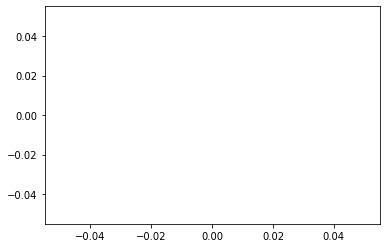

Solucion: [nan, nan] nan


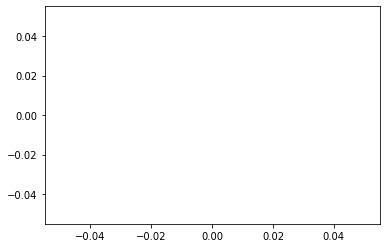

Solucion: [nan, nan] nan


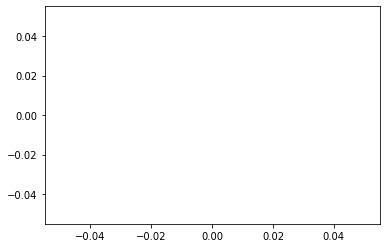

Solucion: [nan, nan] nan


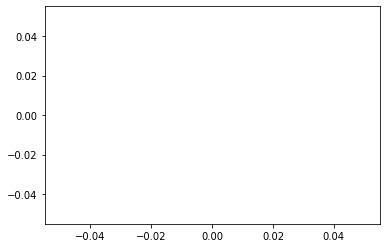

Solucion: [nan, nan] nan


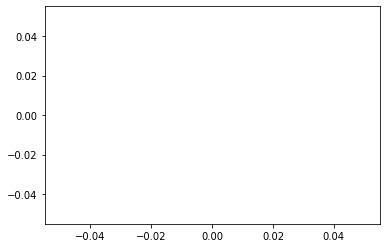

Solucion: [nan, nan] nan


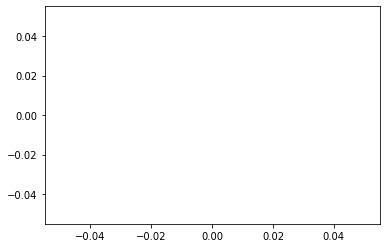

Solucion: [nan, nan] nan


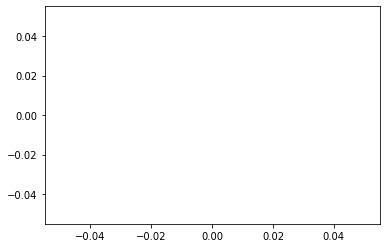

Solucion: [nan, nan] nan


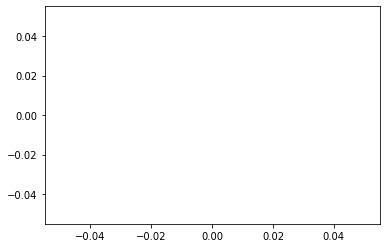

Solucion: [nan, nan] nan


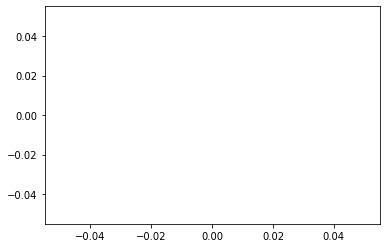

Solucion: [nan, nan] nan


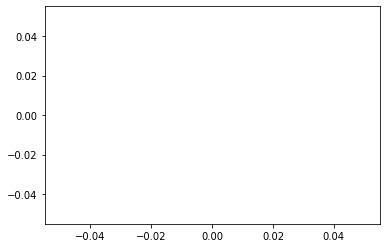

Solucion: [nan, nan] nan


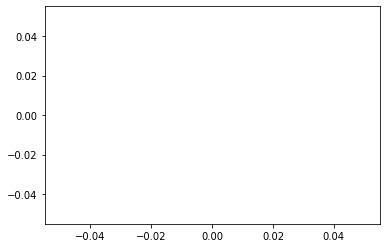

Solucion: [nan, nan] nan


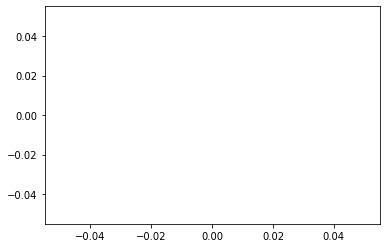

Solucion: [nan, nan] nan


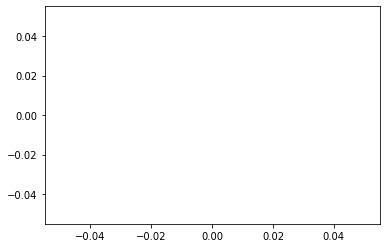

Solucion: [nan, nan] nan


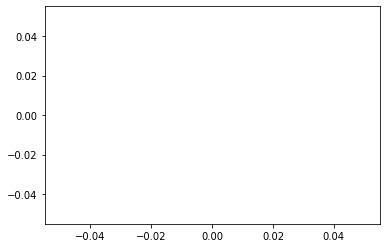

Solucion: [nan, nan] nan


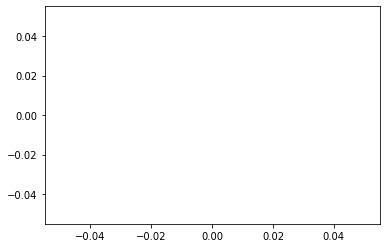

Solucion: [nan, nan] nan


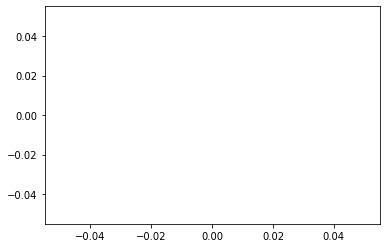

Solucion: [nan, nan] nan


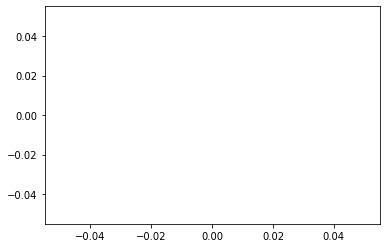

Solucion: [nan, nan] nan


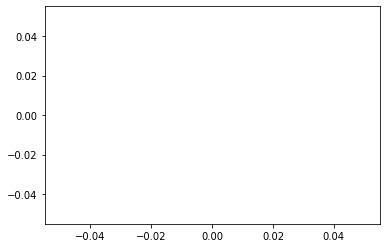

Solucion: [nan, nan] nan


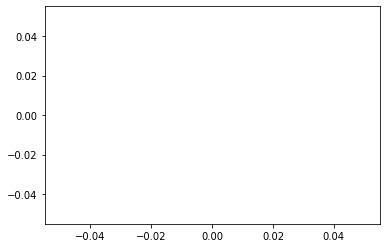

Solucion: [nan, nan] nan


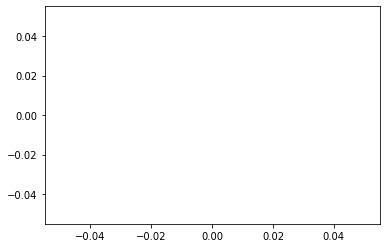

Solucion: [nan, nan] nan


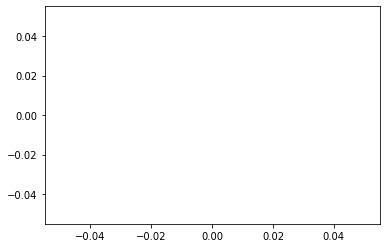

Solucion: [nan, nan] nan


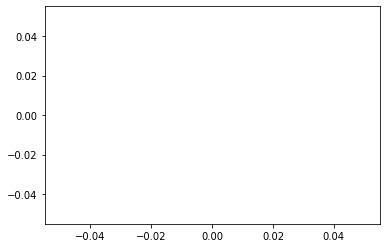

Solucion: [nan, nan] nan


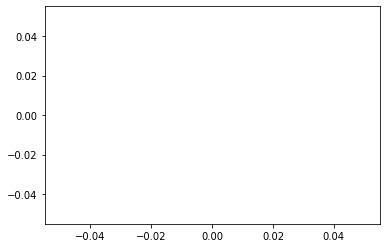

Solucion: [nan, nan] nan


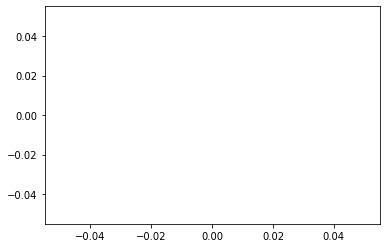

Solucion: [nan, nan] nan


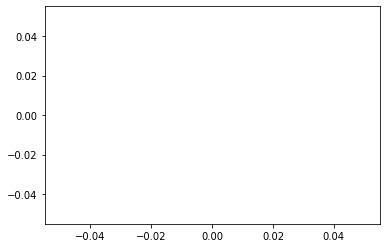

Solucion: [nan, nan] nan


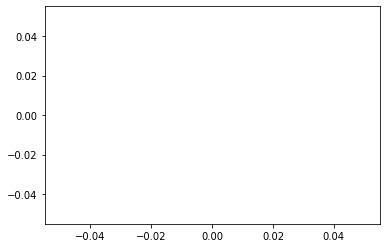

Solucion: [nan, nan] nan


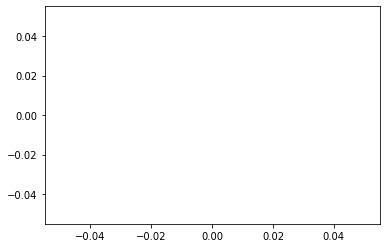

Solucion: [nan, nan] nan


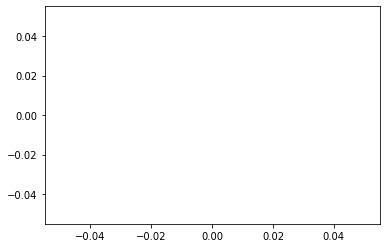

Solucion: [nan, nan] nan


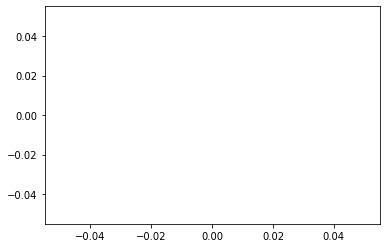

Solucion: [nan, nan] nan


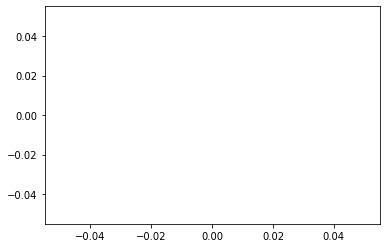

Solucion: [nan, nan] nan


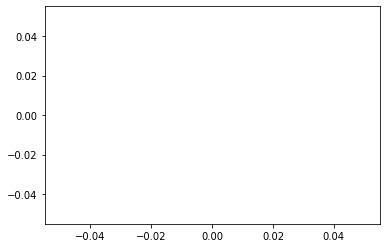

Solucion: [nan, nan] nan


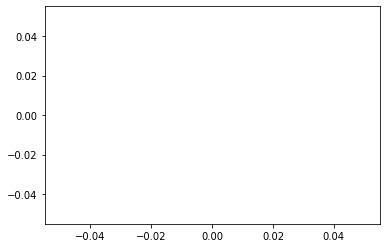

Solucion: [nan, nan] nan


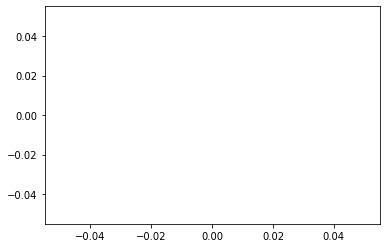

Solucion: [nan, nan] nan


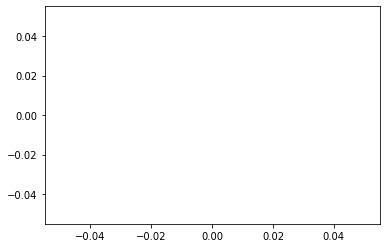

Solucion: [nan, nan] nan


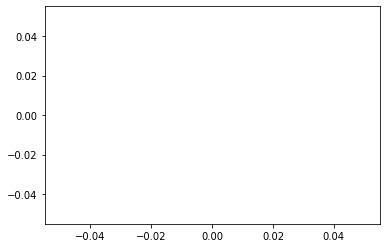

Solucion: [nan, nan] nan


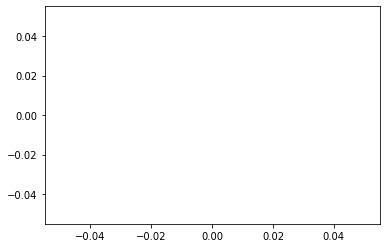

Solucion: [nan, nan] nan


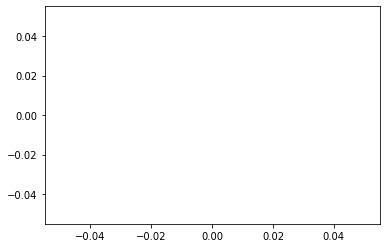

Solucion: [nan, nan] nan


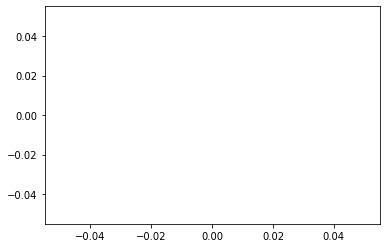

Solucion: [nan, nan] nan


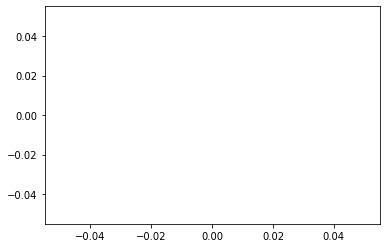

Solucion: [nan, nan] nan


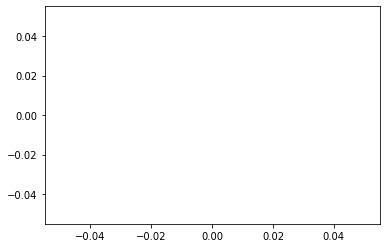

Solucion: [nan, nan] nan


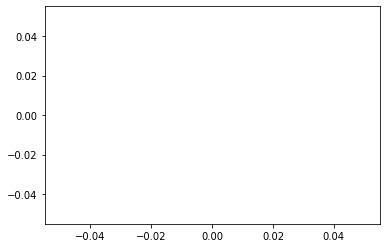

Solucion: [nan, nan] nan


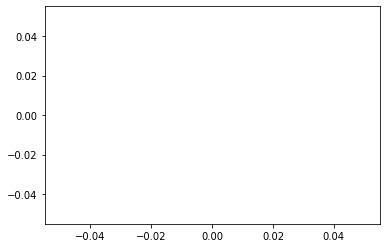

Solucion: [nan, nan] nan


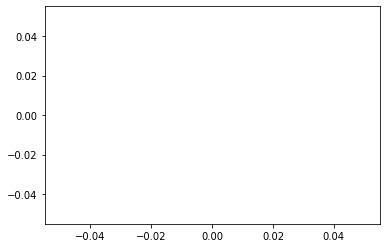

Solucion: [nan, nan] nan


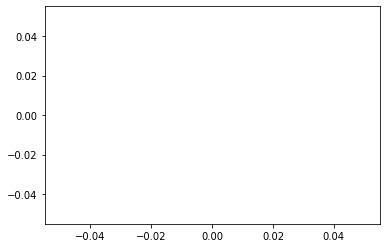

Solucion: [nan, nan] nan


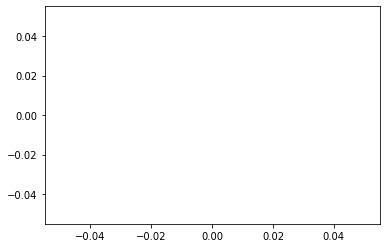

Solucion: [nan, nan] nan


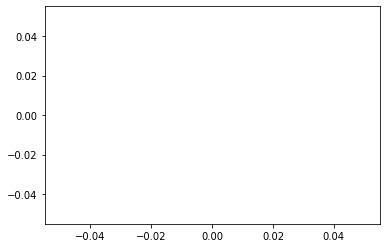

Solucion: [nan, nan] nan


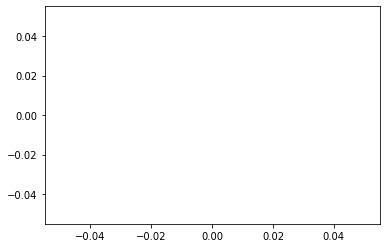

Solucion: [nan, nan] nan


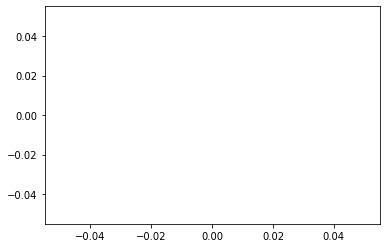

Solucion: [nan, nan] nan


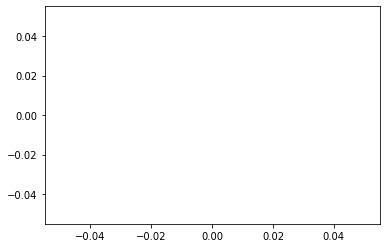

Solucion: [nan, nan] nan


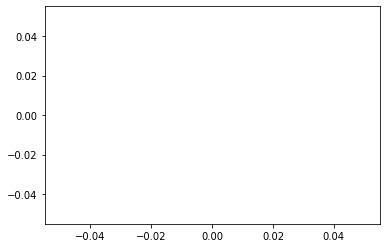

Solucion: [nan, nan] nan


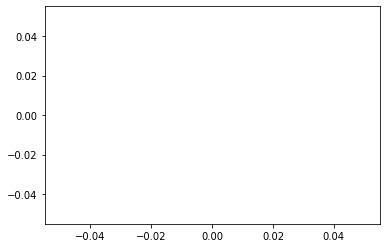

Solucion: [nan, nan] nan


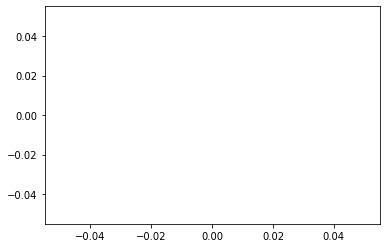

Solucion: [nan, nan] nan


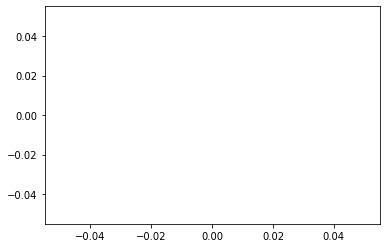

Solucion: [nan, nan] nan


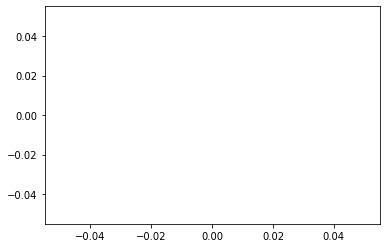

Solucion: [nan, nan] nan


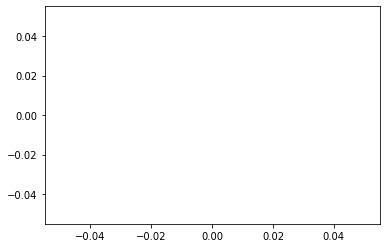

Solucion: [nan, nan] nan


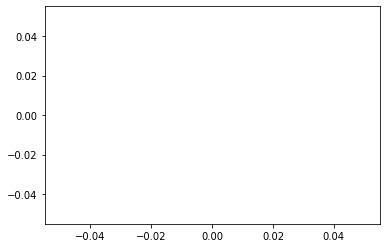

Solucion: [nan, nan] nan


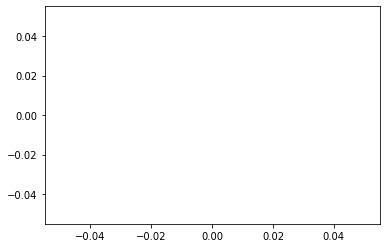

Solucion: [nan, nan] nan


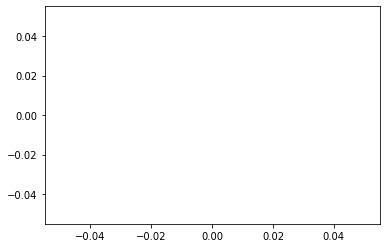

Solucion: [nan, nan] nan


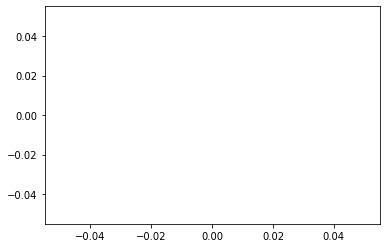

Solucion: [nan, nan] nan


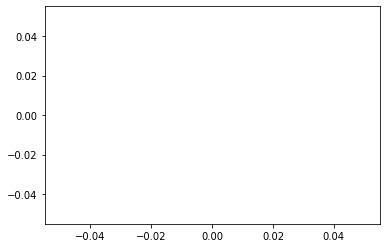

Solucion: [nan, nan] nan


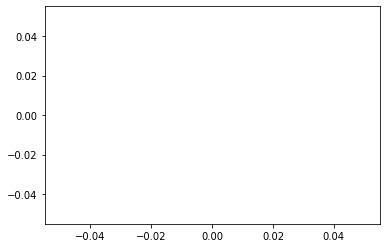

Solucion: [nan, nan] nan


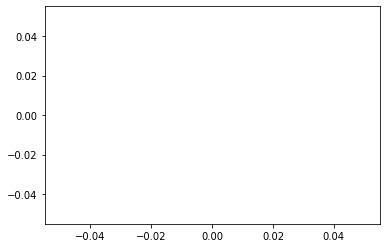

Solucion: [nan, nan] nan


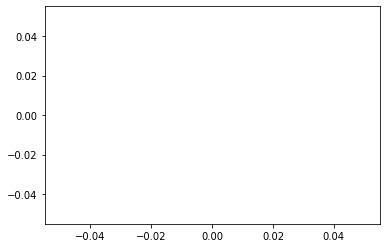

Solucion: [nan, nan] nan


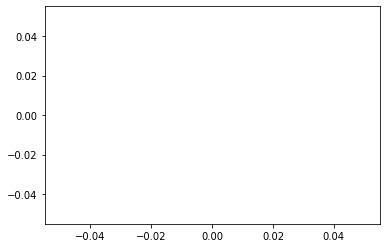

Solucion: [nan, nan] nan


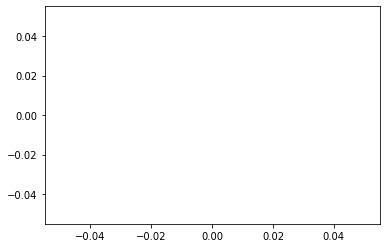

Solucion: [nan, nan] nan


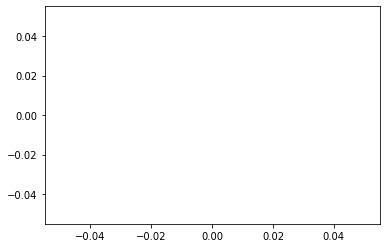

Solucion: [nan, nan] nan


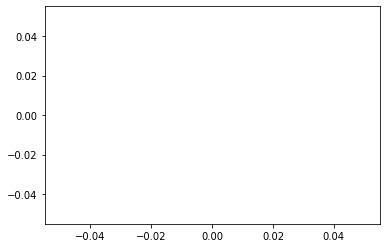

Solucion: [nan, nan] nan


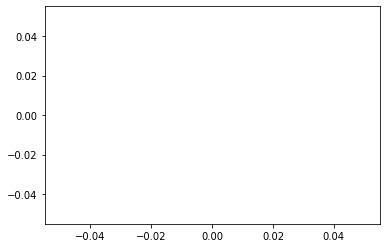

Solucion: [nan, nan] nan


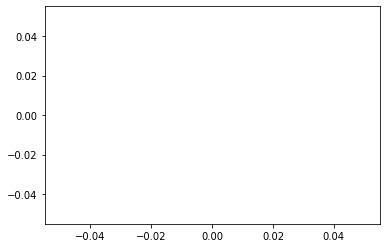

Solucion: [nan, nan] nan


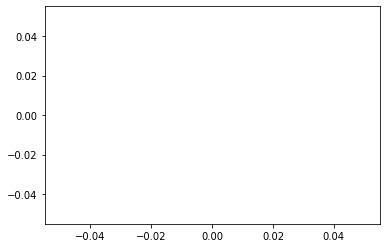

Solucion: [nan, nan] nan


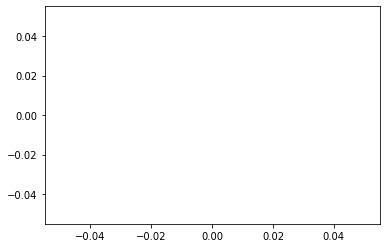

Solucion: [nan, nan] nan


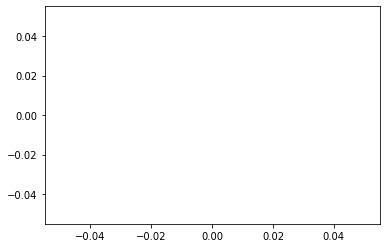

Solucion: [nan, nan] nan


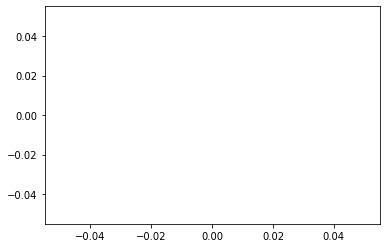

Solucion: [nan, nan] nan


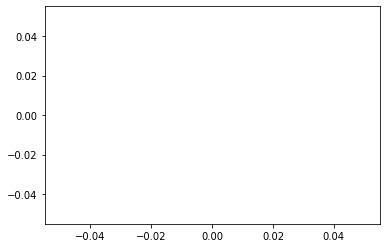

Solucion: [nan, nan] nan


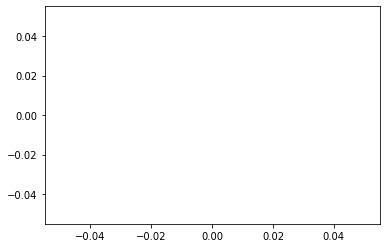

Solucion: [nan, nan] nan


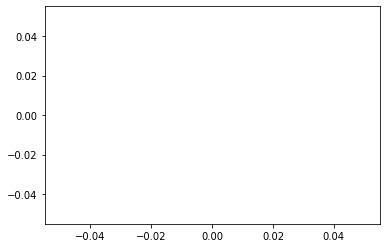

Solucion: [nan, nan] nan


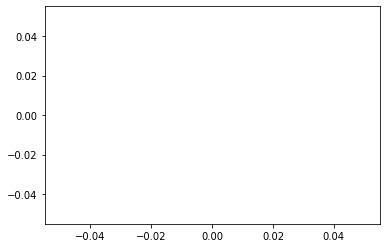

Solucion: [nan, nan] nan


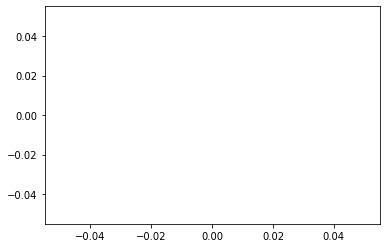

Solucion: [nan, nan] nan


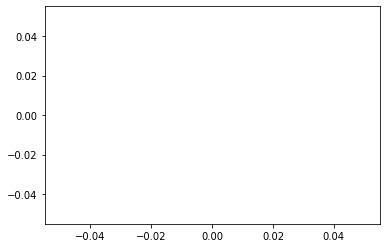

Solucion: [nan, nan] nan


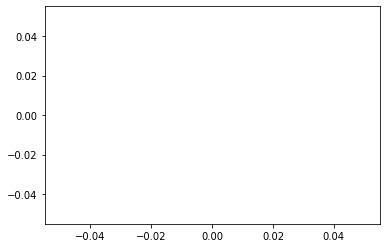

Solucion: [nan, nan] nan


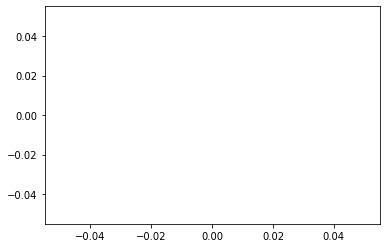

Solucion: [nan, nan] nan


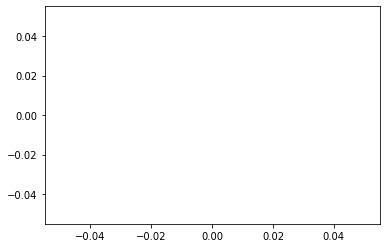

Solucion: [nan, nan] nan


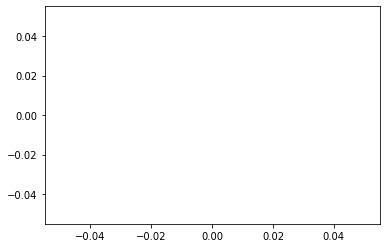

Solucion: [nan, nan] nan


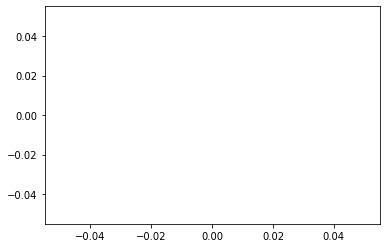

Solucion: [nan, nan] nan


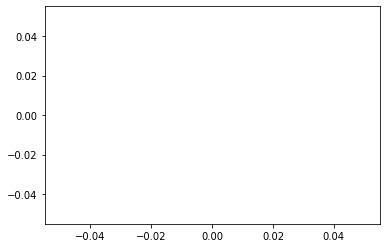

Solucion: [nan, nan] nan


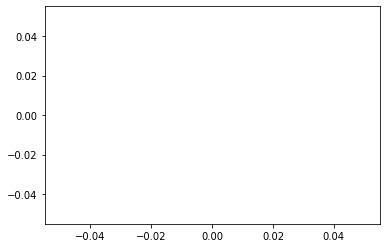

Solucion: [nan, nan] nan


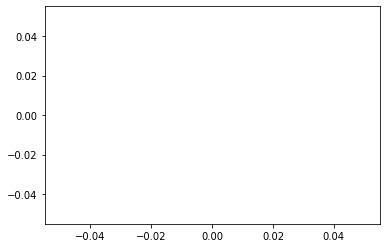

Solucion: [nan, nan] nan


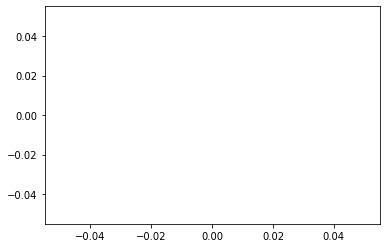

Solucion: [nan, nan] nan


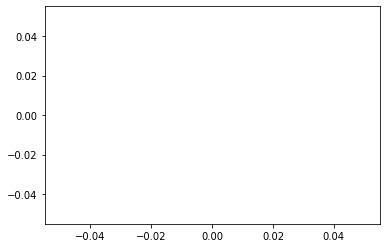

Solucion: [nan, nan] nan


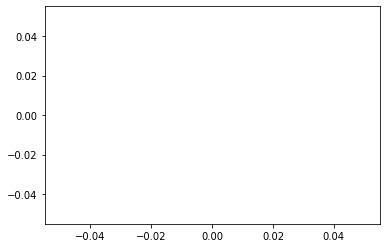

Solucion: [nan, nan] nan


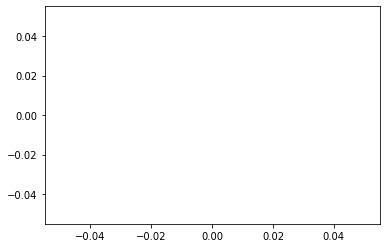

Solucion: [nan, nan] nan


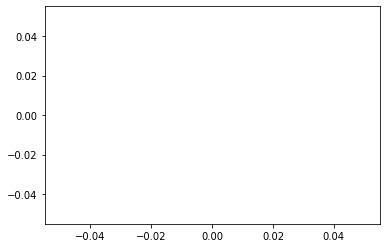

Solucion: [nan, nan] nan


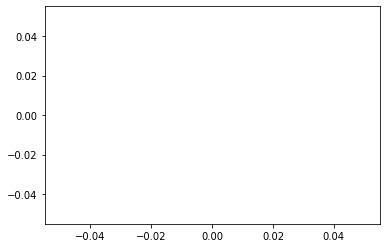

Solucion: [nan, nan] nan


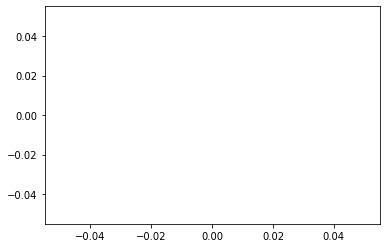

Solucion: [nan, nan] nan


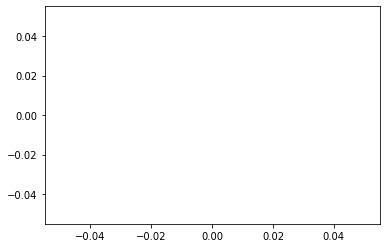

Solucion: [nan, nan] nan


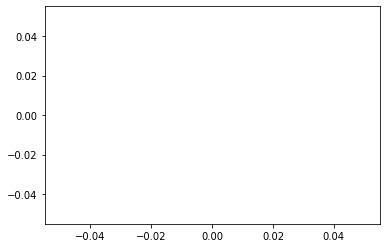

Solucion: [nan, nan] nan


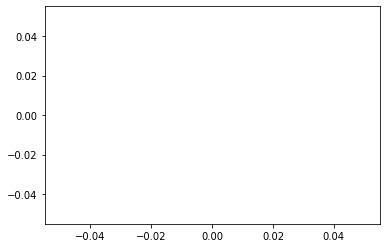

Solucion: [nan, nan] nan


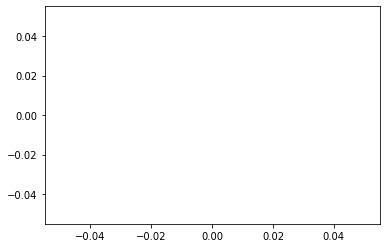

Solucion: [nan, nan] nan


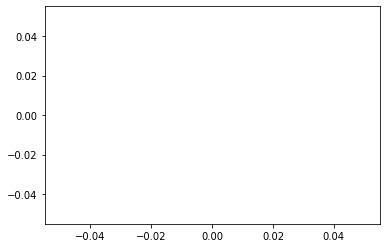

Solucion: [nan, nan] nan


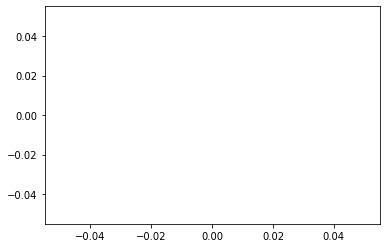

Solucion: [nan, nan] nan


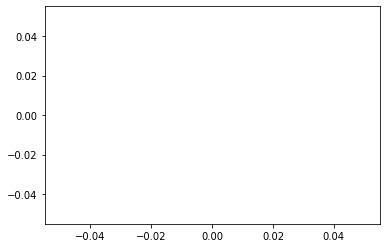

Solucion: [nan, nan] nan


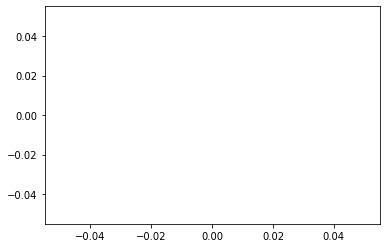

Solucion: [nan, nan] nan


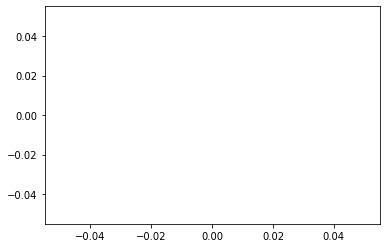

Solucion: [nan, nan] nan


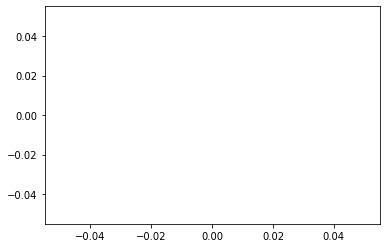

Solucion: [nan, nan] nan


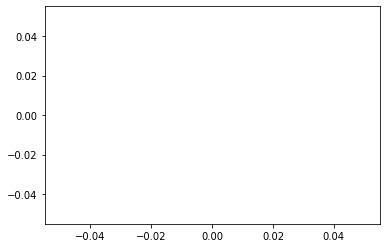

Solucion: [nan, nan] nan


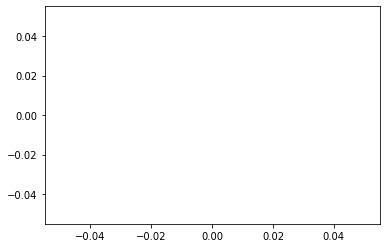

Solucion: [nan, nan] nan


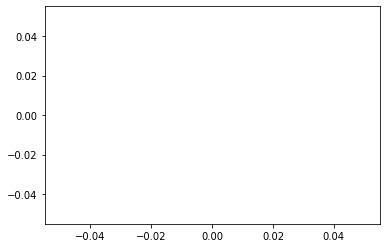

Solucion: [nan, nan] nan


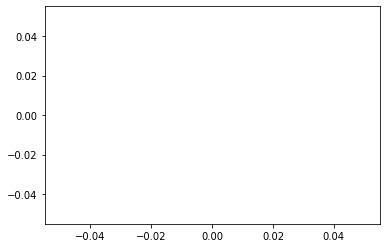

Solucion: [nan, nan] nan


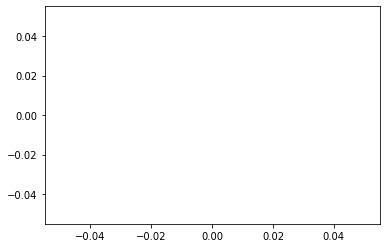

Solucion: [nan, nan] nan


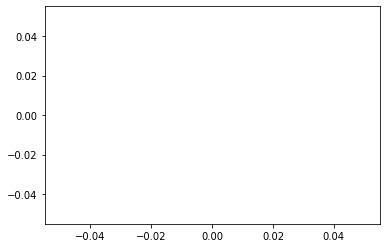

Solucion: [nan, nan] nan


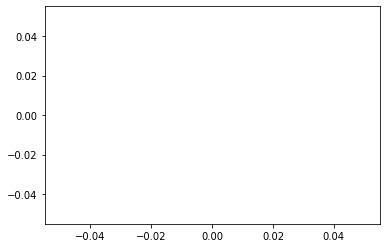

Solucion: [nan, nan] nan


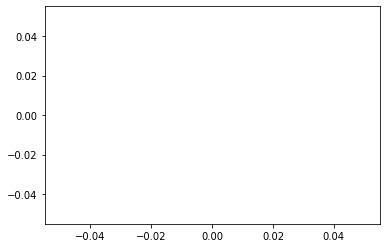

Solucion: [nan, nan] nan


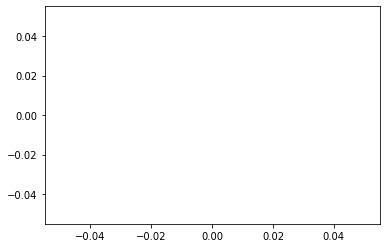

Solucion: [nan, nan] nan


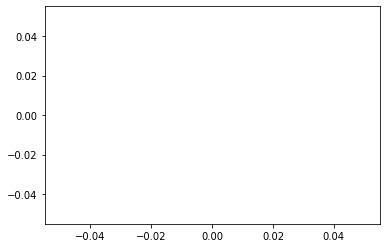

Solucion: [nan, nan] nan


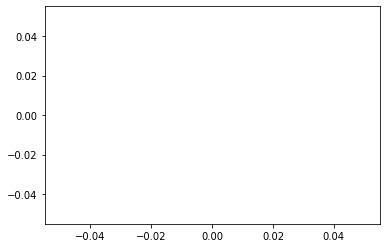

Solucion: [nan, nan] nan


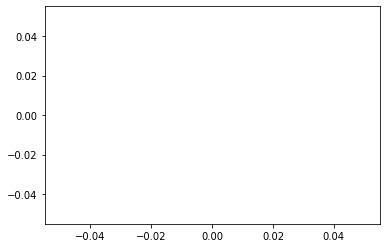

Solucion: [nan, nan] nan


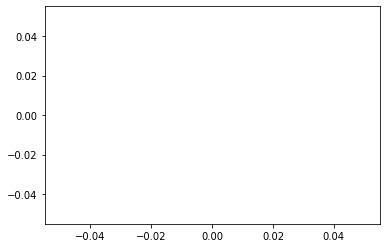

Solucion: [nan, nan] nan


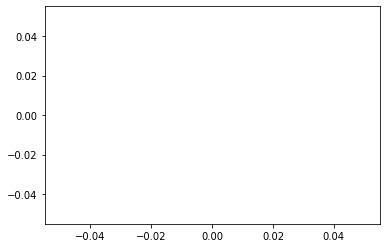

Solucion: [nan, nan] nan


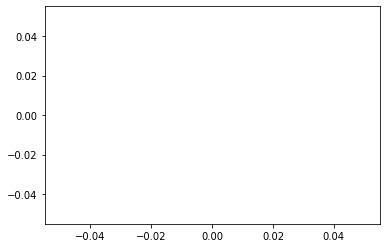

Solucion: [nan, nan] nan


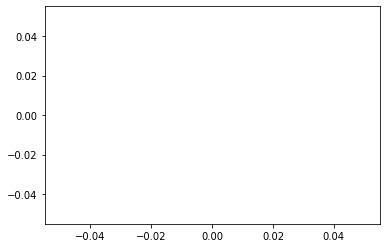

Solucion: [nan, nan] nan


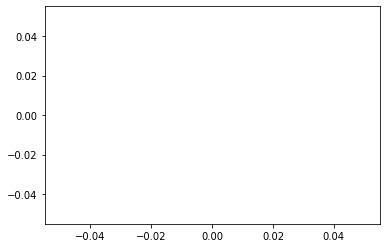

Solucion: [nan, nan] nan


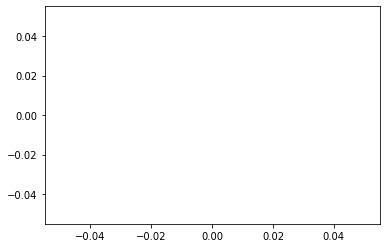

Solucion: [nan, nan] nan


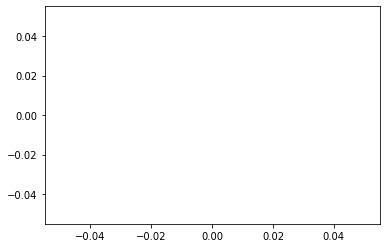

Solucion: [nan, nan] nan


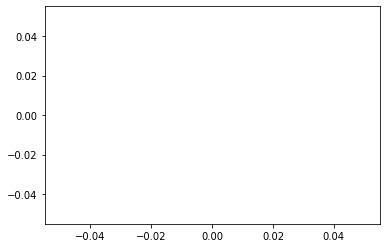

Solucion: [nan, nan] nan


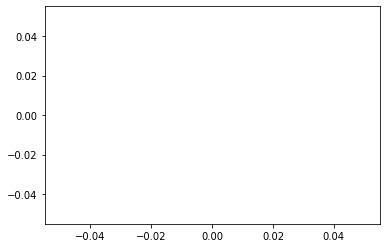

Solucion: [nan, nan] nan


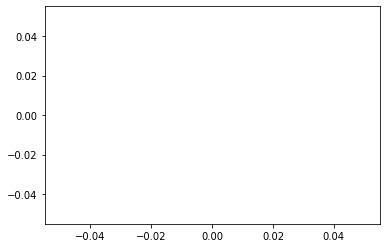

Solucion: [nan, nan] nan


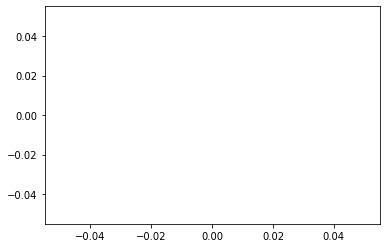

Solucion: [nan, nan] nan


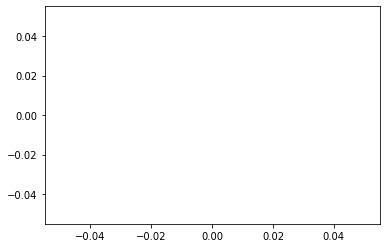

Solucion: [nan, nan] nan


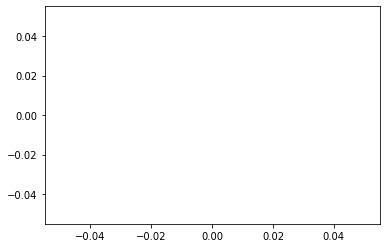

Solucion: [nan, nan] nan


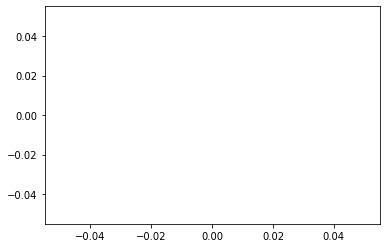

Solucion: [nan, nan] nan


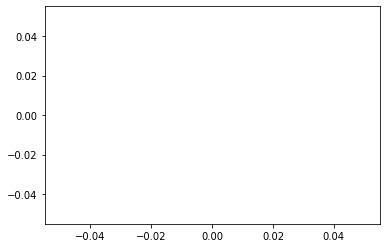

Solucion: [nan, nan] nan


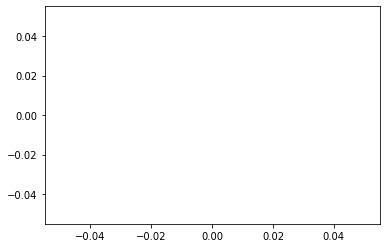

Solucion: [nan, nan] nan


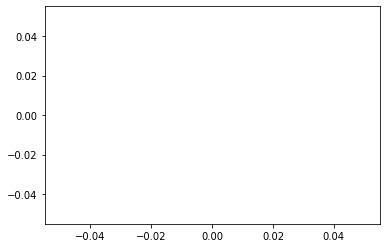

Solucion: [nan, nan] nan


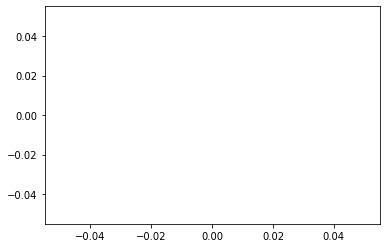

Solucion: [nan, nan] nan


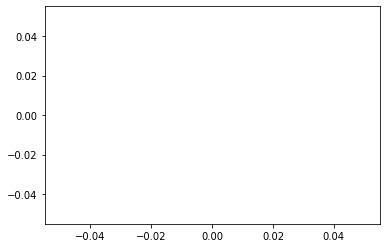

Solucion: [nan, nan] nan


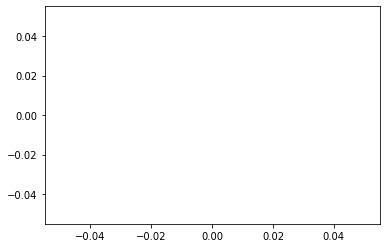

Solucion: [nan, nan] nan


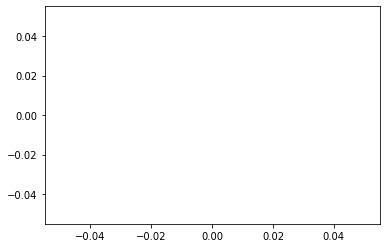

Solucion: [nan, nan] nan


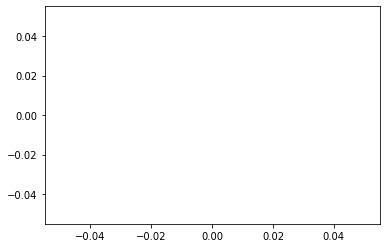

Solucion: [nan, nan] nan


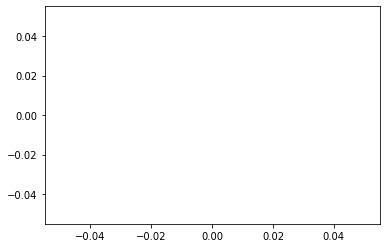

Solucion: [nan, nan] nan


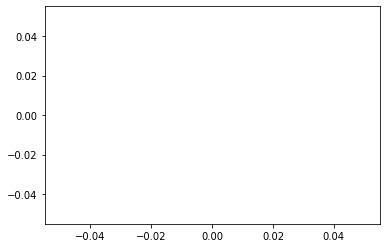

Solucion: [nan, nan] nan


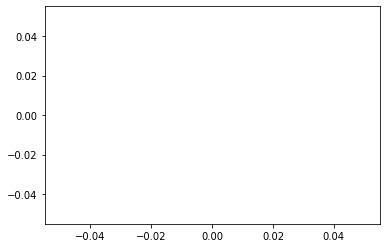

Solucion: [nan, nan] nan


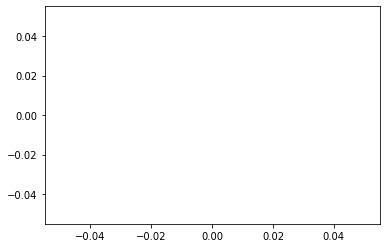

Solucion: [nan, nan] nan


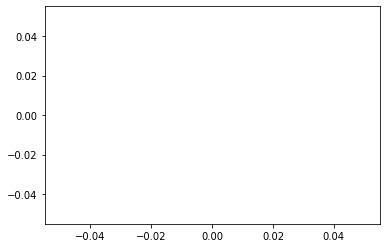

Solucion: [nan, nan] nan


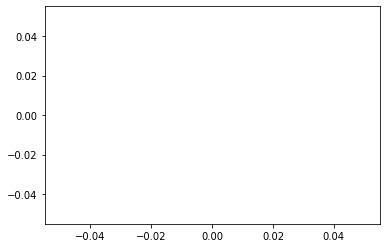

Solucion: [nan, nan] nan


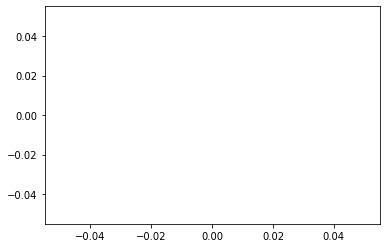

Solucion: [nan, nan] nan


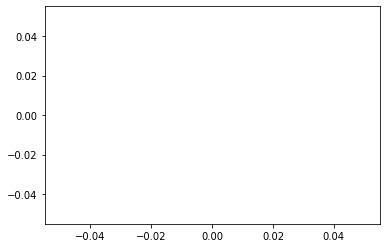

Solucion: [nan, nan] nan


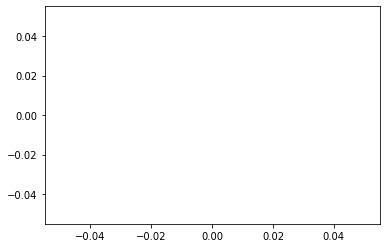

Solucion: [nan, nan] nan


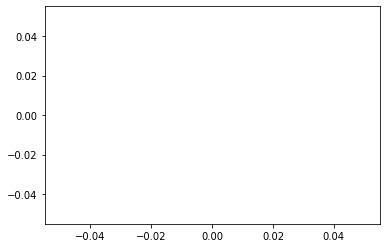

Solucion: [nan, nan] nan


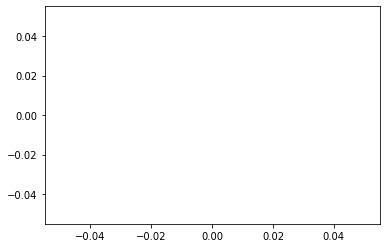

Solucion: [nan, nan] nan


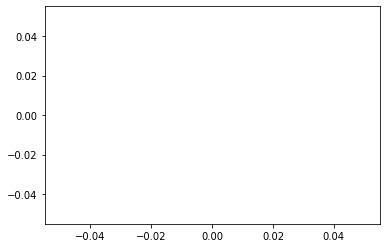

Solucion: [nan, nan] nan


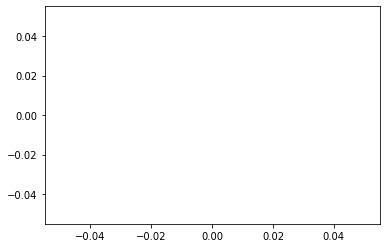

Solucion: [nan, nan] nan


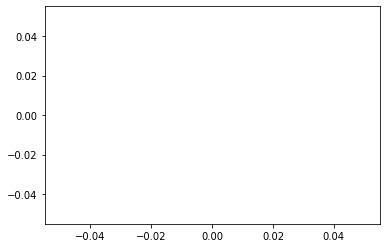

Solucion: [nan, nan] nan


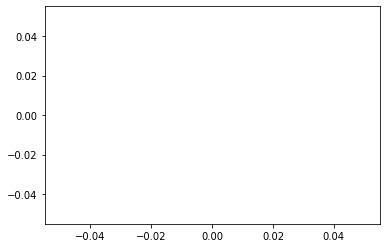

Solucion: [nan, nan] nan


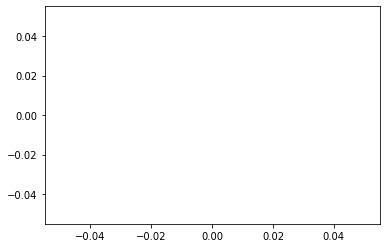

Solucion: [nan, nan] nan


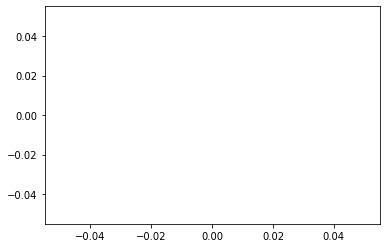

Solucion: [nan, nan] nan


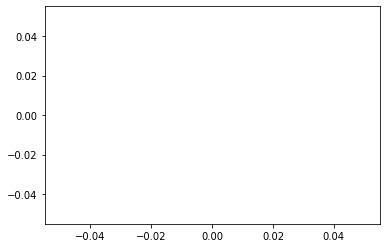

Solucion: [nan, nan] nan


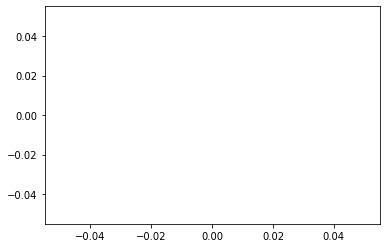

Solucion: [nan, nan] nan


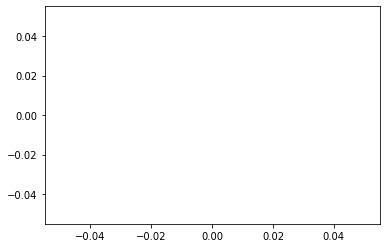

Solucion: [nan, nan] nan


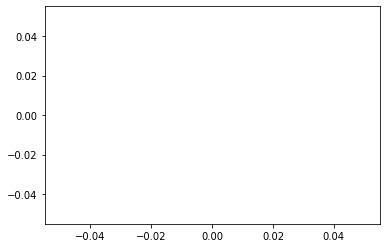

Solucion: [nan, nan] nan


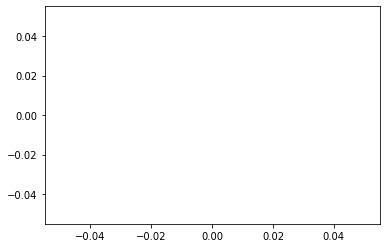

Solucion: [nan, nan] nan


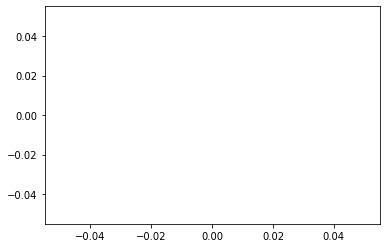

Solucion: [nan, nan] nan


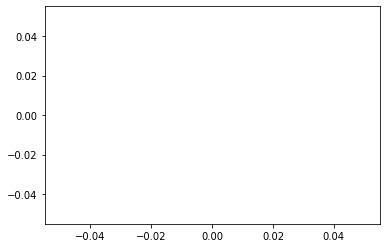

Solucion: [nan, nan] nan


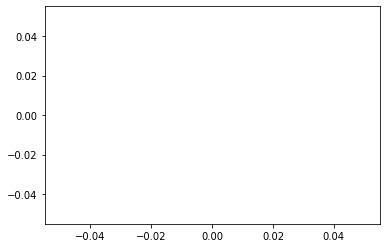

Solucion: [nan, nan] nan


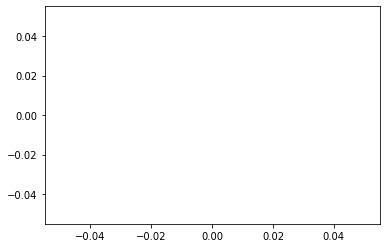

Solucion: [nan, nan] nan


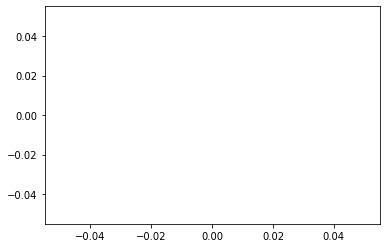

Solucion: [nan, nan] nan


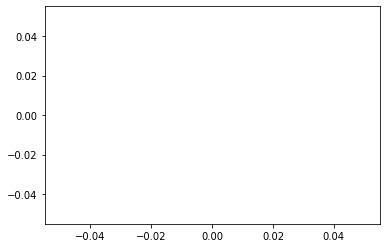

Solucion: [nan, nan] nan


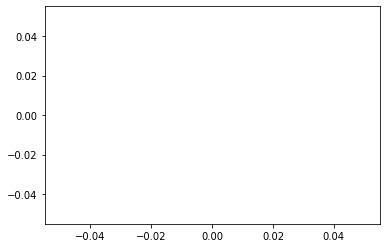

Solucion: [nan, nan] nan


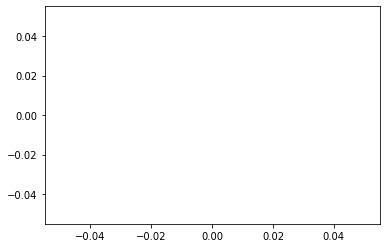

Solucion: [nan, nan] nan


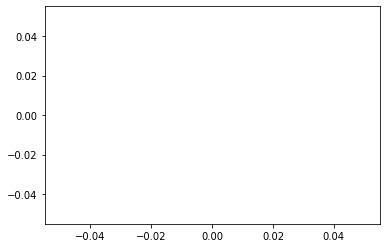

Solucion: [nan, nan] nan


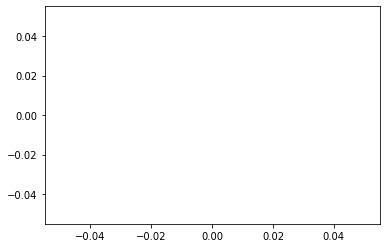

Solucion: [nan, nan] nan


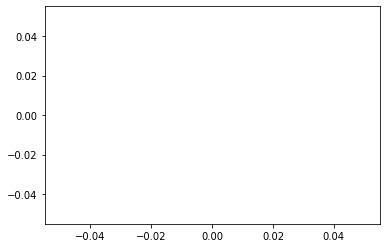

Solucion: [nan, nan] nan


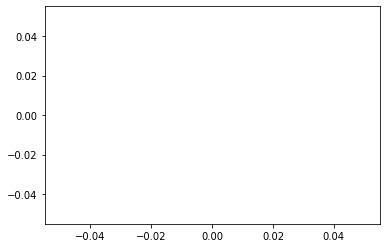

Solucion: [nan, nan] nan


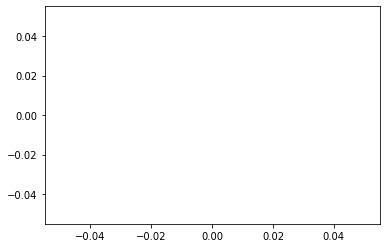

Solucion: [nan, nan] nan


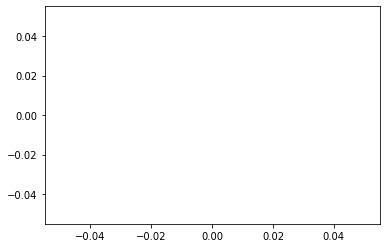

Solucion: [nan, nan] nan


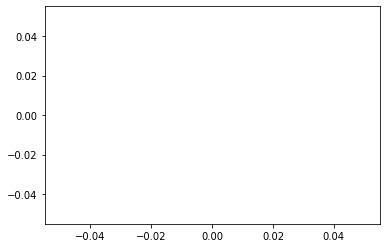

Solucion: [nan, nan] nan


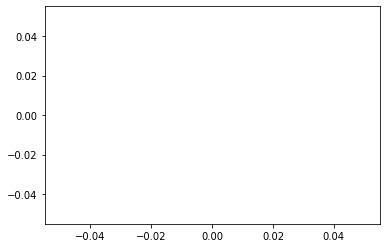

Solucion: [nan, nan] nan


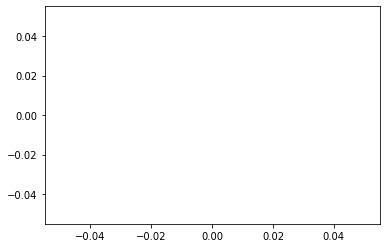

Solucion: [nan, nan] nan


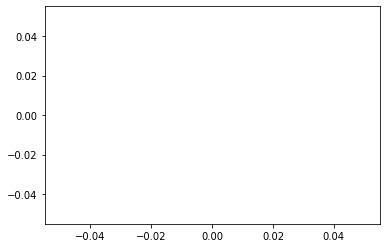

Solucion: [nan, nan] nan


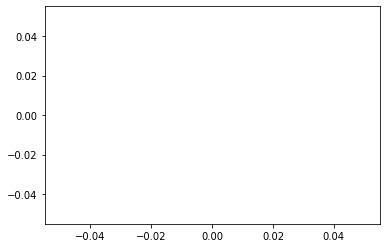

Solucion: [nan, nan] nan


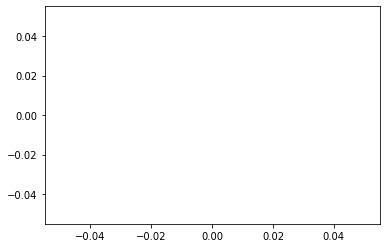

Solucion: [nan, nan] nan


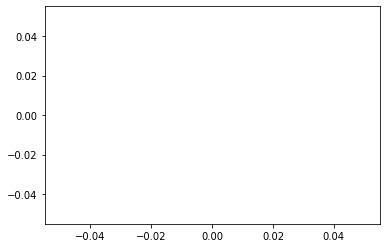

Solucion: [nan, nan] nan


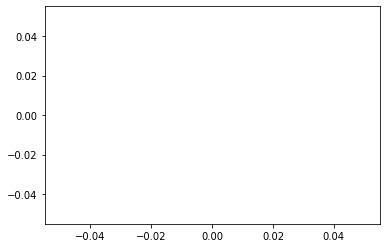

Solucion: [nan, nan] nan


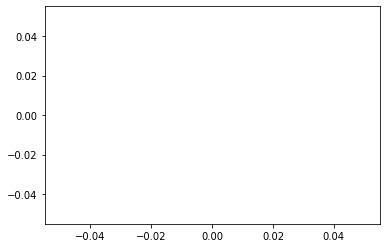

Solucion: [nan, nan] nan


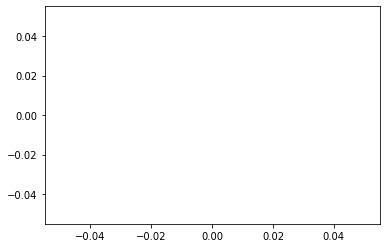

Solucion: [nan, nan] nan


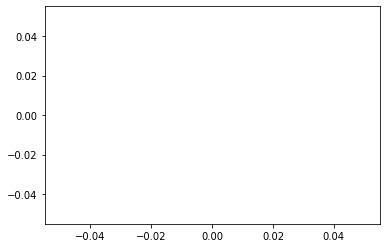

Solucion: [nan, nan] nan


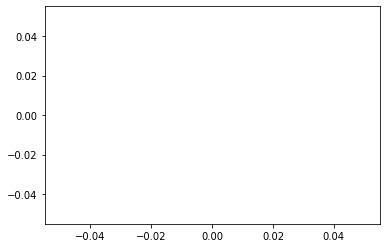

Solucion: [nan, nan] nan


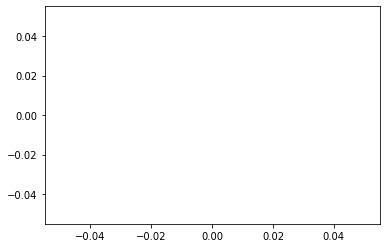

Solucion: [nan, nan] nan


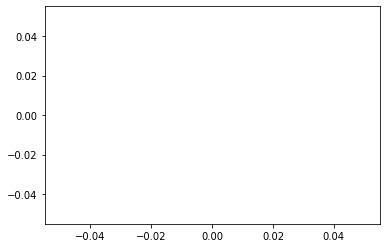

Solucion: [nan, nan] nan


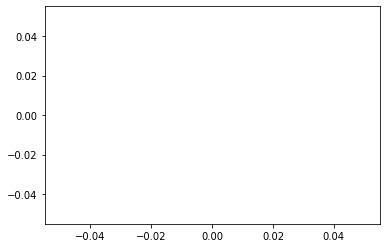

Solucion: [nan, nan] nan


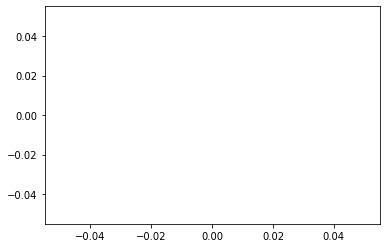

Solucion: [nan, nan] nan


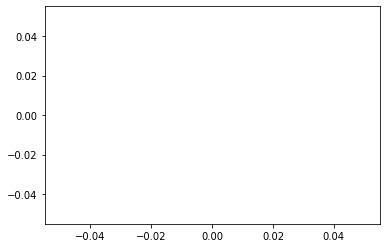

Solucion: [nan, nan] nan


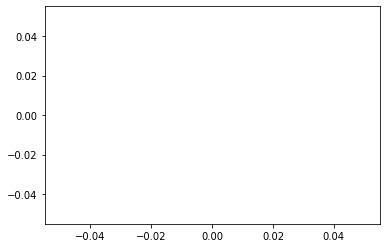

Solucion: [nan, nan] nan


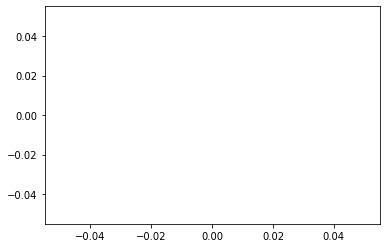

Solucion: [nan, nan] nan


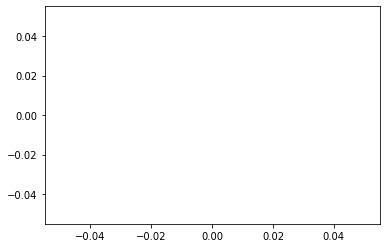

Solucion: [nan, nan] nan


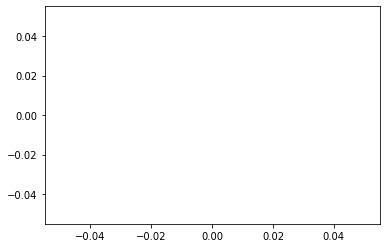

Solucion: [nan, nan] nan


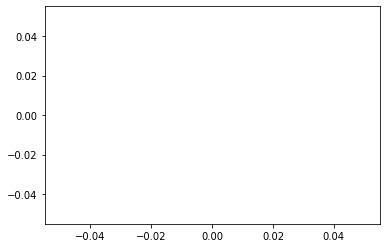

Solucion: [nan, nan] nan


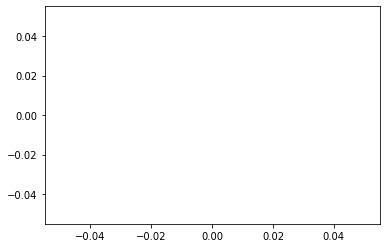

Solucion: [nan, nan] nan


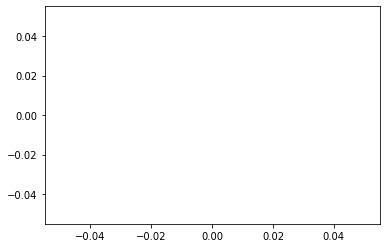

Solucion: [nan, nan] nan


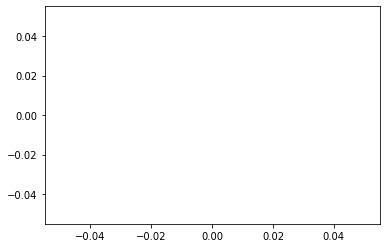

Solucion: [nan, nan] nan


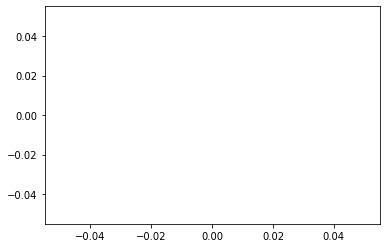

Solucion: [nan, nan] nan


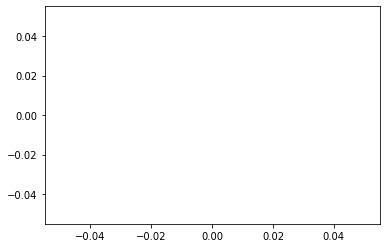

Solucion: [nan, nan] nan


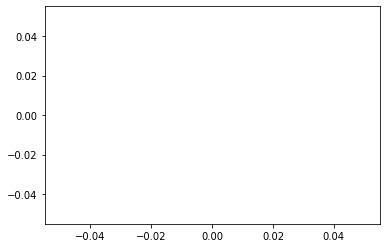

Solucion: [nan, nan] nan


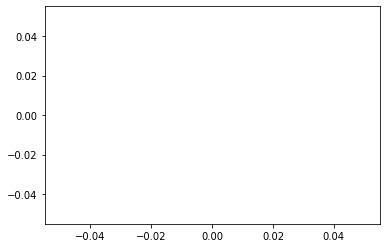

Solucion: [nan, nan] nan


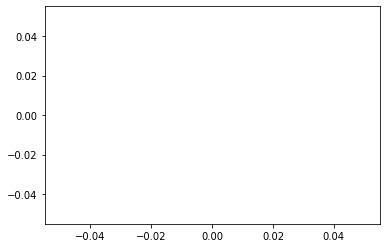

Solucion: [nan, nan] nan


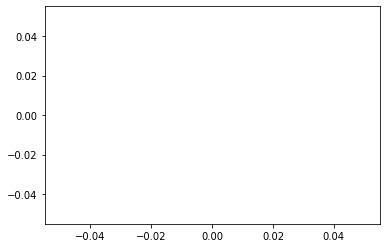

Solucion: [nan, nan] nan


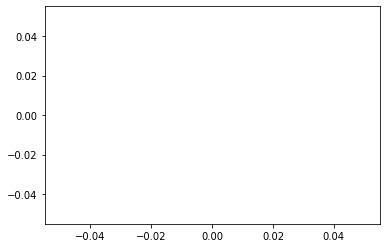

Solucion: [nan, nan] nan


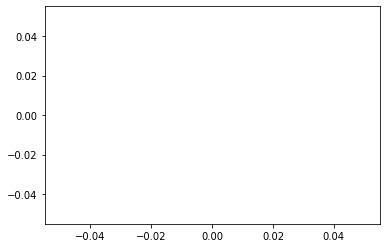

Solucion: [nan, nan] nan


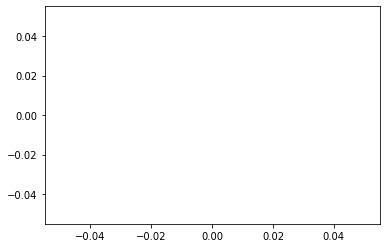

Solucion: [nan, nan] nan


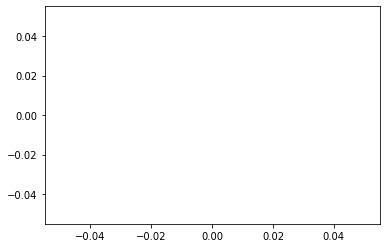

Solucion: [nan, nan] nan


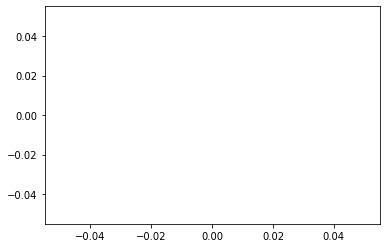

Solucion: [nan, nan] nan


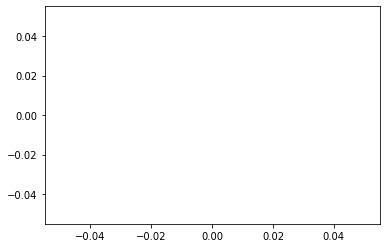

Solucion: [nan, nan] nan


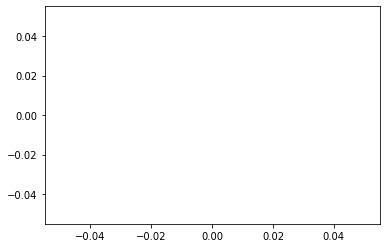

Solucion: [nan, nan] nan


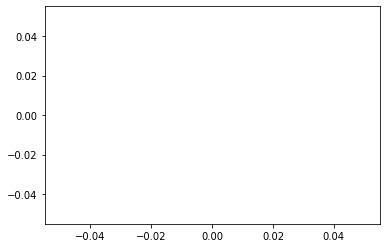

Solucion: [nan, nan] nan


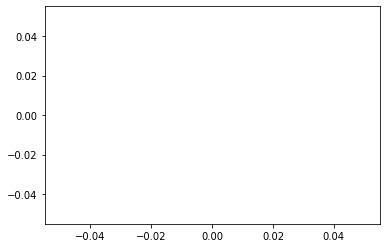

Solucion: [nan, nan] nan


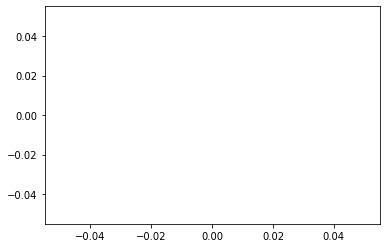

Solucion: [nan, nan] nan


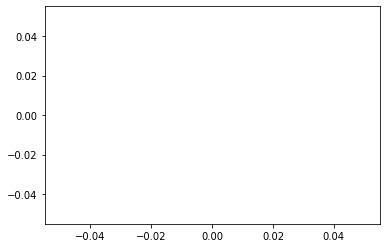

Solucion: [nan, nan] nan


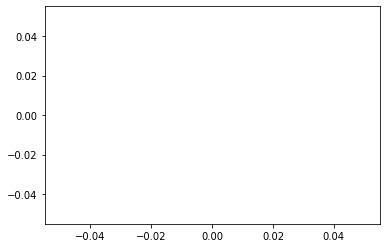

Solucion: [nan, nan] nan


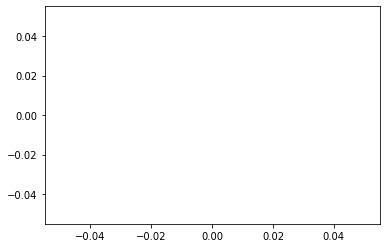

Solucion: [nan, nan] nan


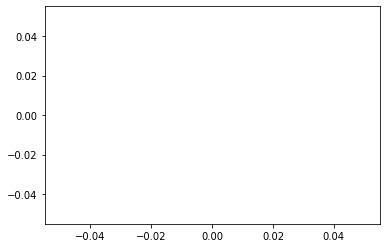

Solucion: [nan, nan] nan


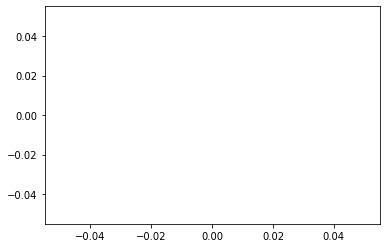

Solucion: [nan, nan] nan


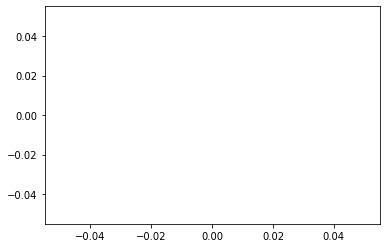

Solucion: [nan, nan] nan


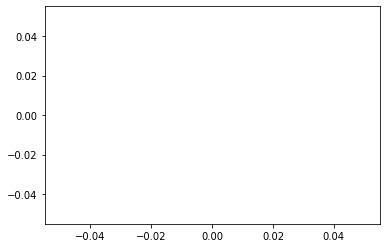

Solucion: [nan, nan] nan


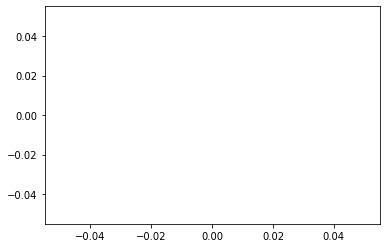

Solucion: [nan, nan] nan


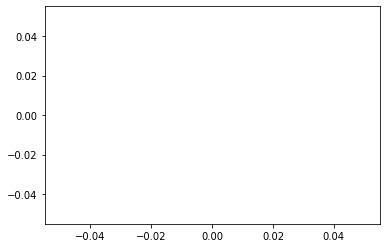

Solucion: [nan, nan] nan


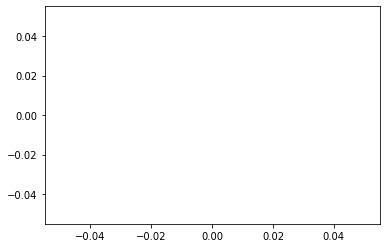

Solucion: [nan, nan] nan


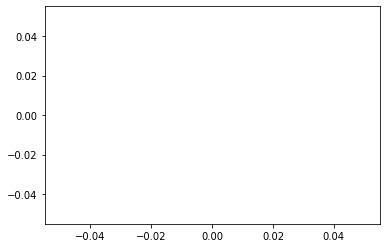

Solucion: [nan, nan] nan


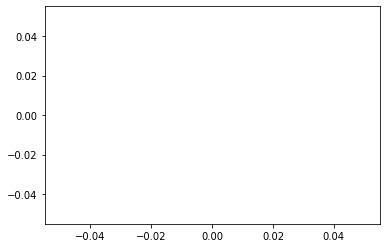

Solucion: [nan, nan] nan


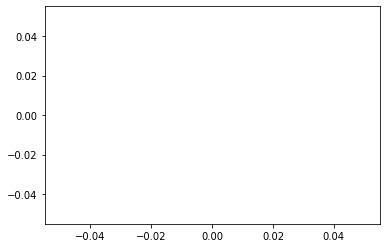

Solucion: [nan, nan] nan


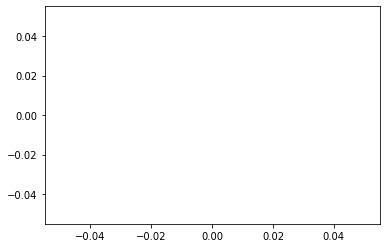

Solucion: [nan, nan] nan


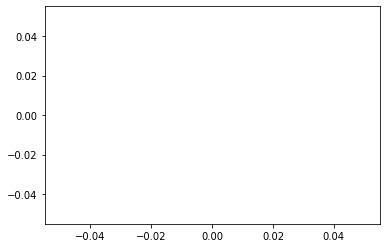

Solucion: [nan, nan] nan


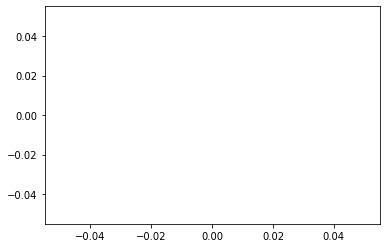

Solucion: [nan, nan] nan


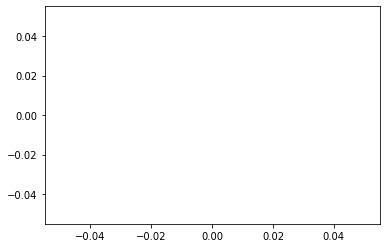

Solucion: [nan, nan] nan


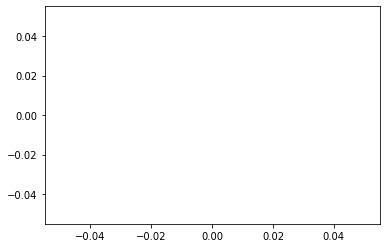

Solucion: [nan, nan] nan


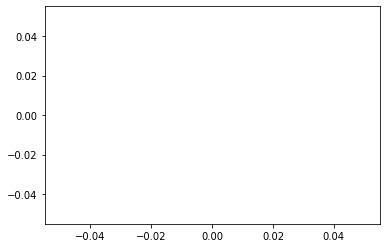

Solucion: [nan, nan] nan


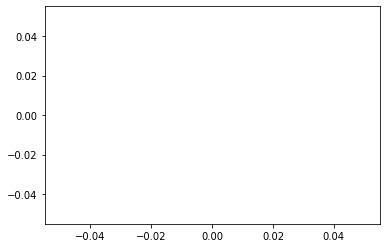

Solucion: [nan, nan] nan


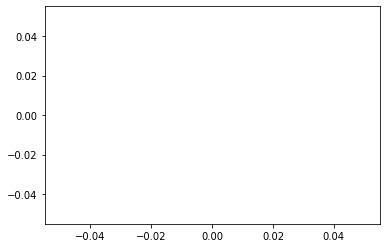

Solucion: [nan, nan] nan


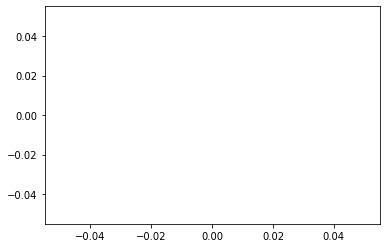

Solucion: [nan, nan] nan


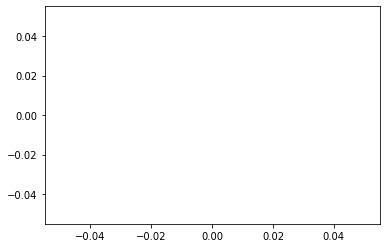

Solucion: [nan, nan] nan


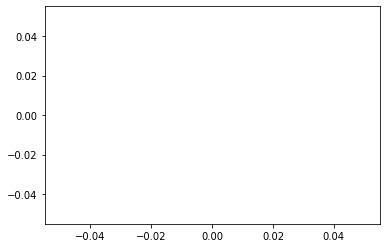

Solucion: [nan, nan] nan


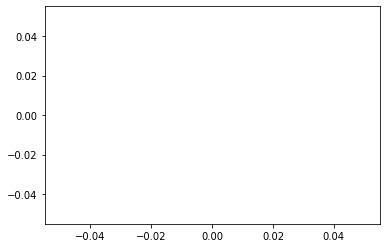

Solucion: [nan, nan] nan


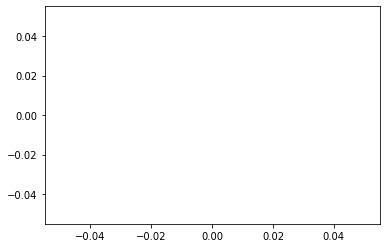

Solucion: [nan, nan] nan


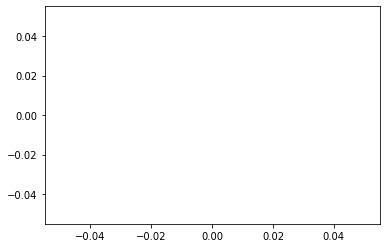

Solucion: [nan, nan] nan


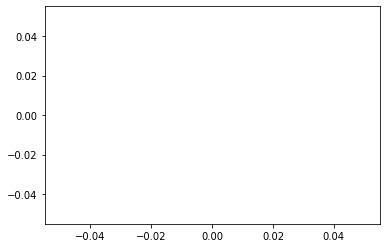

Solucion: [nan, nan] nan


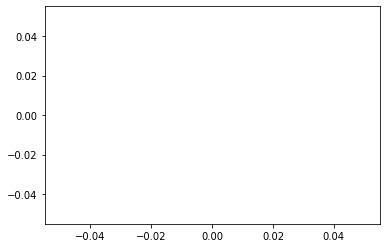

Solucion: [nan, nan] nan


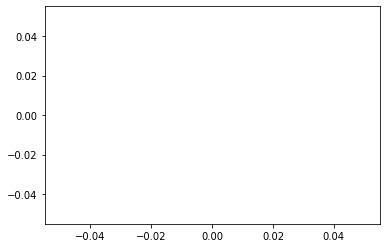

Solucion: [nan, nan] nan


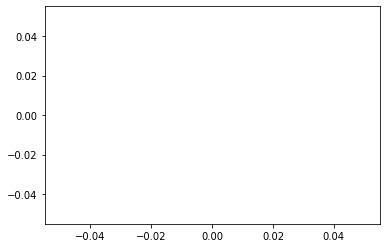

Solucion: [nan, nan] nan


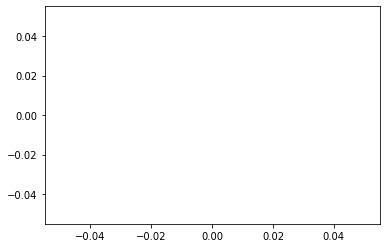

Solucion: [nan, nan] nan


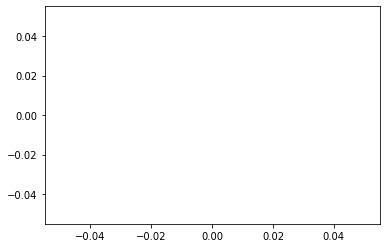

Solucion: [nan, nan] nan


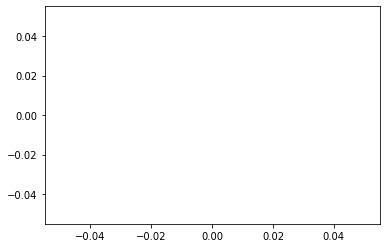

Solucion: [nan, nan] nan


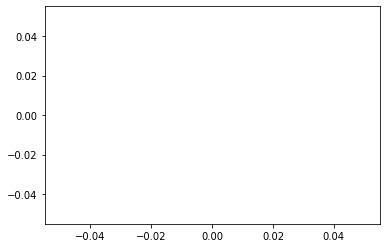

Solucion: [nan, nan] nan


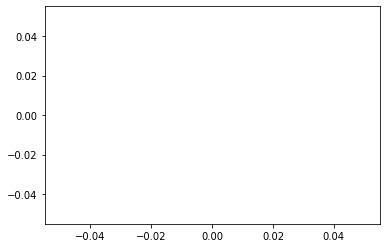

Solucion: [nan, nan] nan


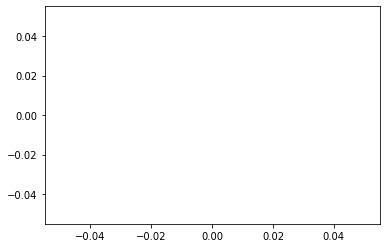

Solucion: [nan, nan] nan


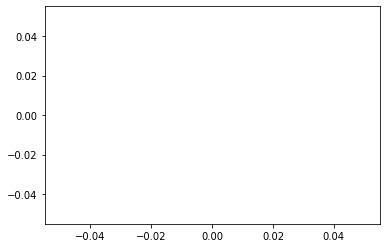

Solucion: [nan, nan] nan


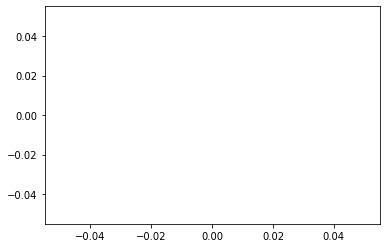

Solucion: [nan, nan] nan


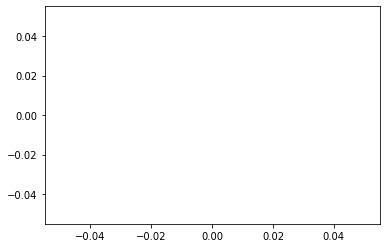

Solucion: [nan, nan] nan


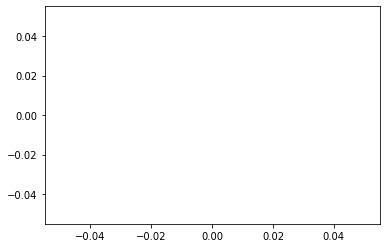

Solucion: [nan, nan] nan


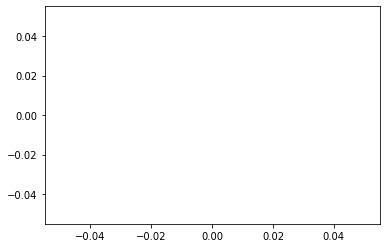

Solucion: [nan, nan] nan


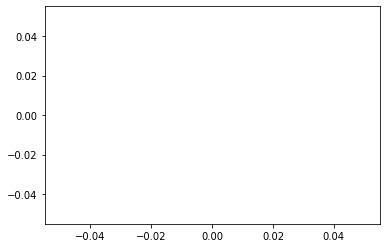

Solucion: [nan, nan] nan


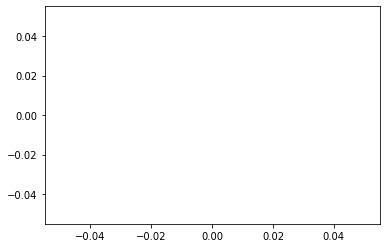

Solucion: [nan, nan] nan


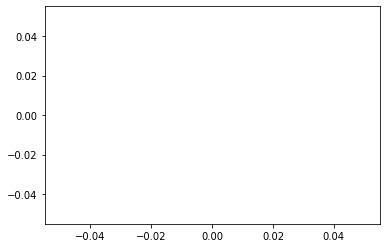

Solucion: [nan, nan] nan


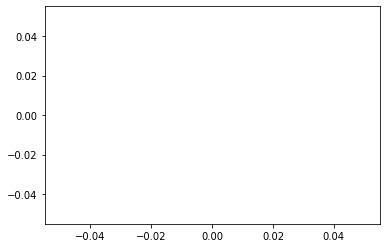

Solucion: [nan, nan] nan


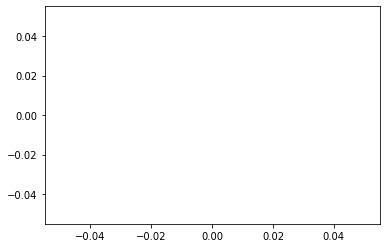

Solucion: [nan, nan] nan


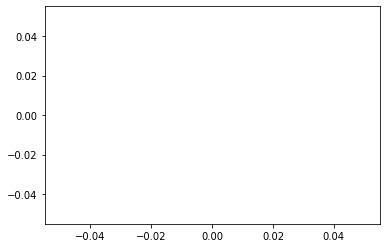

Solucion: [nan, nan] nan


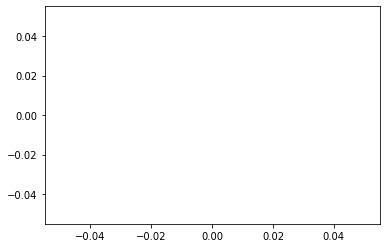

Solucion: [nan, nan] nan


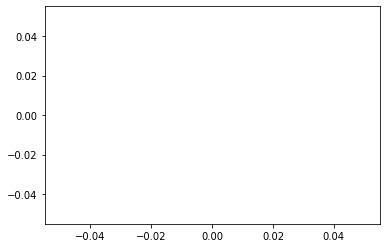

Solucion: [nan, nan] nan


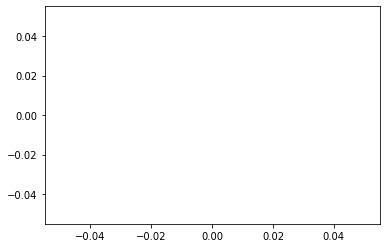

Solucion: [nan, nan] nan


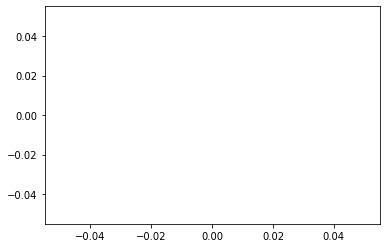

Solucion: [nan, nan] nan


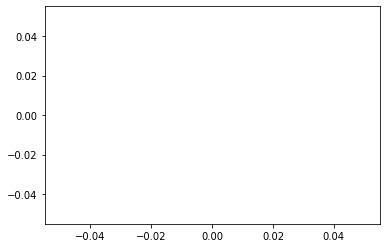

Solucion: [nan, nan] nan


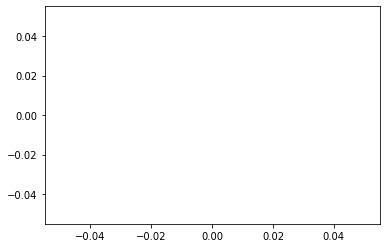

Solucion: [nan, nan] nan


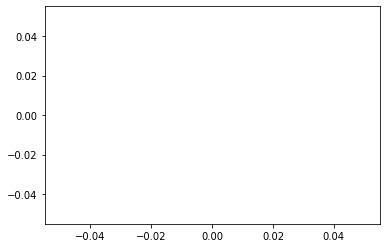

Solucion: [nan, nan] nan


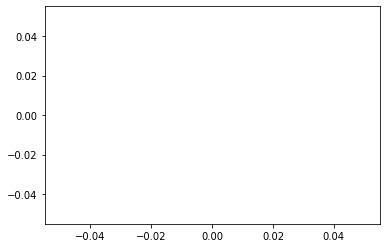

Solucion: [nan, nan] nan


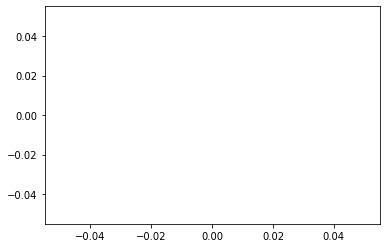

Solucion: [nan, nan] nan


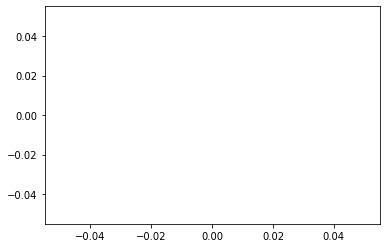

Solucion: [nan, nan] nan


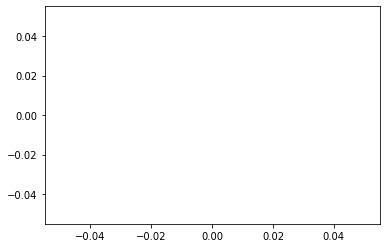

Solucion: [nan, nan] nan


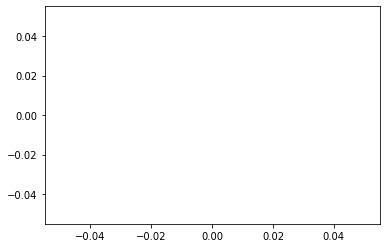

Solucion: [nan, nan] nan


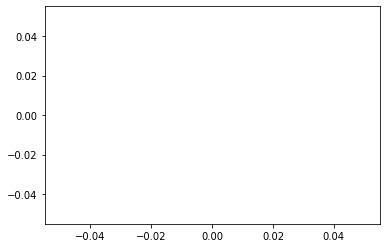

Solucion: [nan, nan] nan


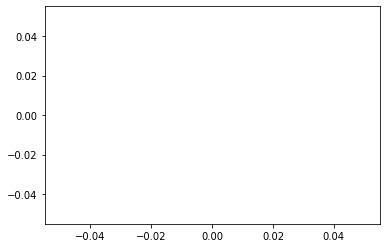

Solucion: [nan, nan] nan


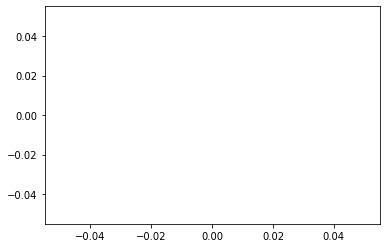

Solucion: [nan, nan] nan


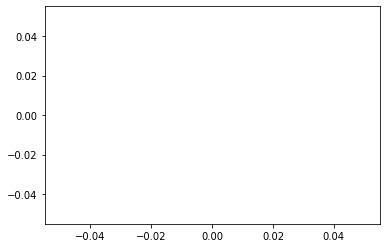

Solucion: [nan, nan] nan


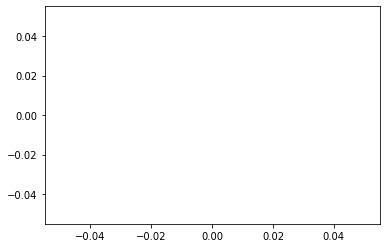

Solucion: [nan, nan] nan


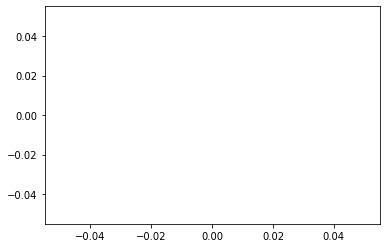

Solucion: [nan, nan] nan


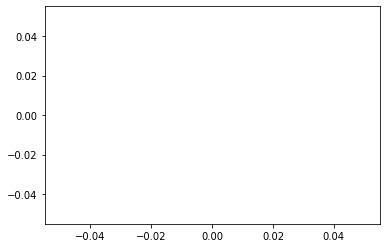

Solucion: [nan, nan] nan


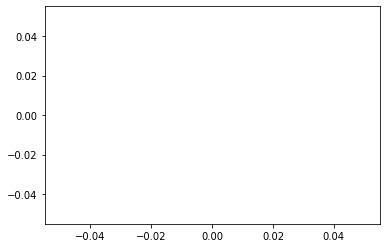

Solucion: [nan, nan] nan


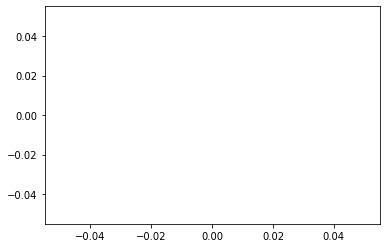

Solucion: [nan, nan] nan


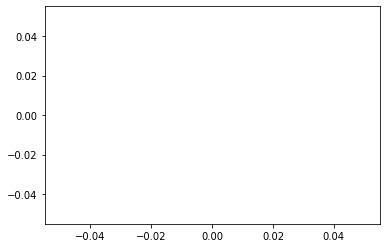

Solucion: [nan, nan] nan


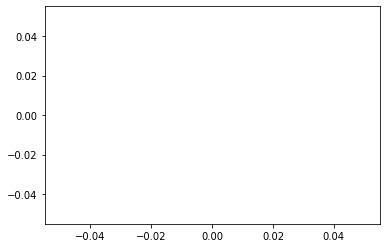

Solucion: [nan, nan] nan


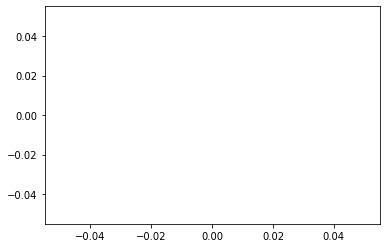

Solucion: [nan, nan] nan


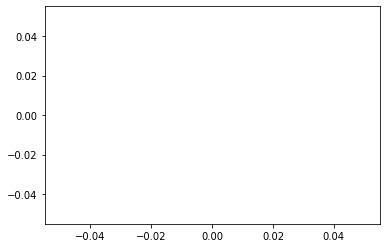

Solucion: [nan, nan] nan


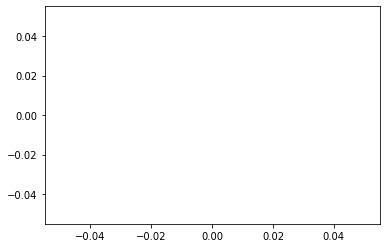

Solucion: [nan, nan] nan


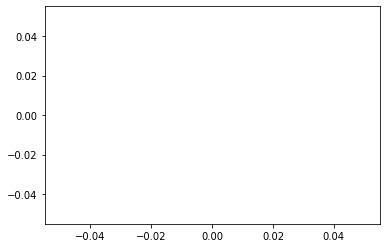

Solucion: [nan, nan] nan


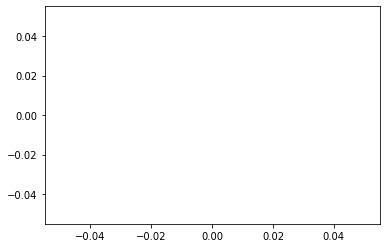

Solucion: [nan, nan] nan


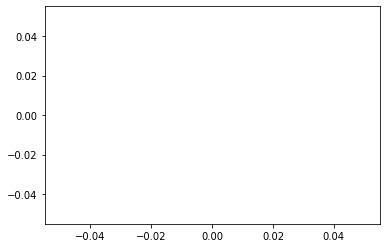

Solucion: [nan, nan] nan


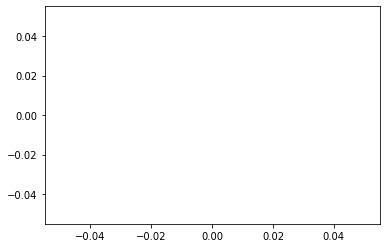

Solucion: [nan, nan] nan


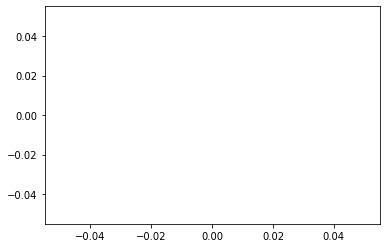

Solucion: [nan, nan] nan


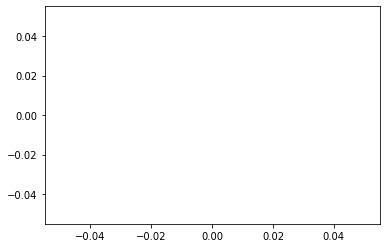

Solucion: [nan, nan] nan


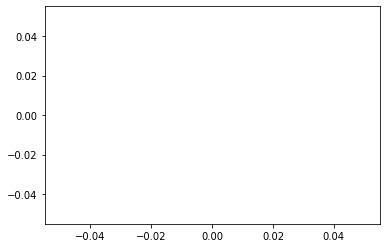

Solucion: [nan, nan] nan


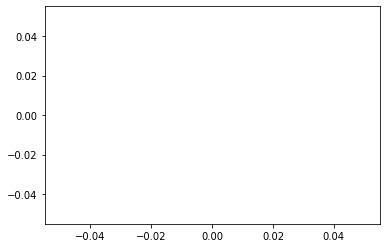

Solucion: [nan, nan] nan


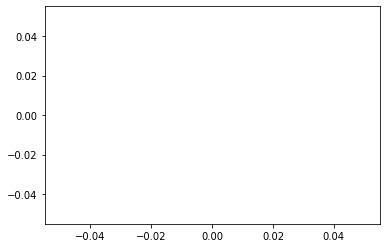

Solucion: [nan, nan] nan


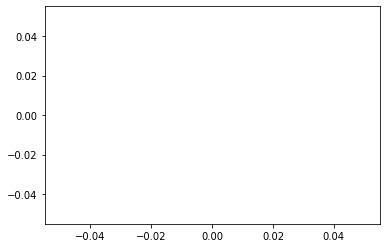

Solucion: [nan, nan] nan


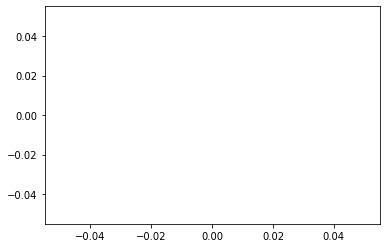

Solucion: [nan, nan] nan


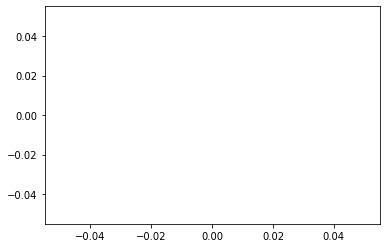

Solucion: [nan, nan] nan


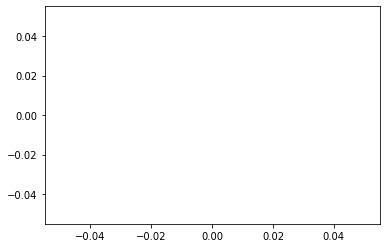

Solucion: [nan, nan] nan


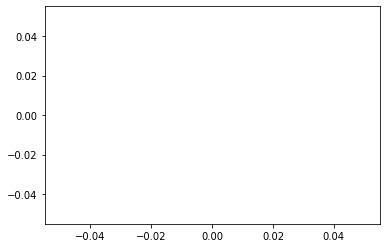

Solucion: [nan, nan] nan


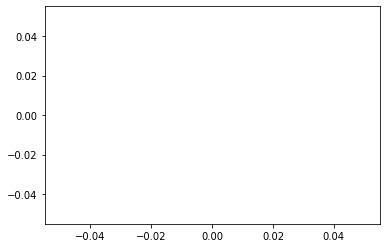

Solucion: [nan, nan] nan


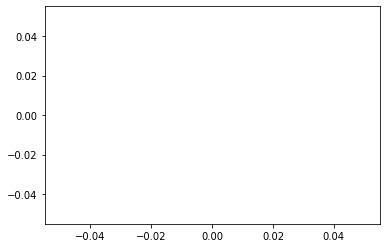

Solucion: [nan, nan] nan


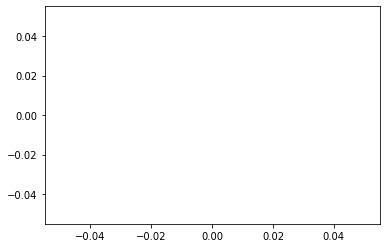

Solucion: [nan, nan] nan


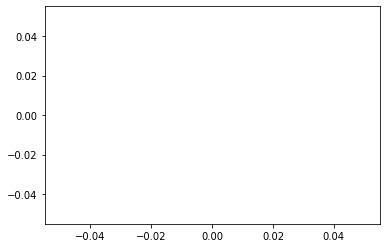

Solucion: [nan, nan] nan


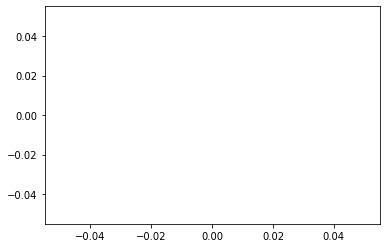

Solucion: [nan, nan] nan


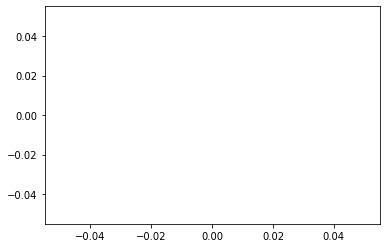

Solucion: [nan, nan] nan


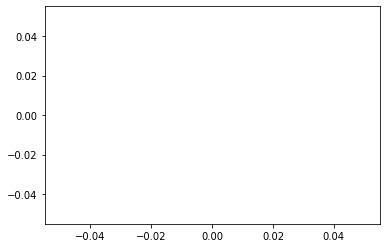

Solucion: [nan, nan] nan


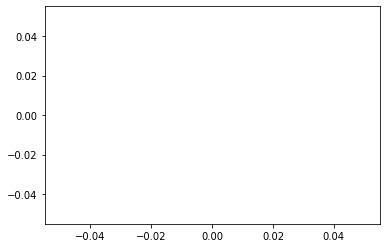

Solucion: [nan, nan] nan


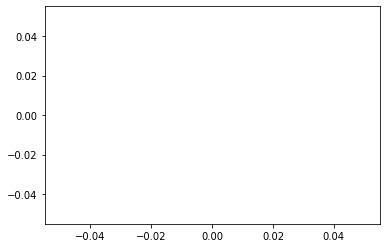

Solucion: [nan, nan] nan


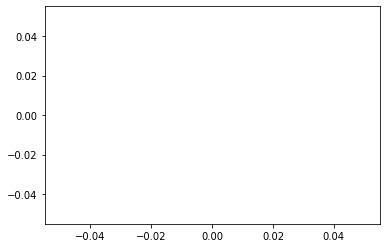

Solucion: [nan, nan] nan


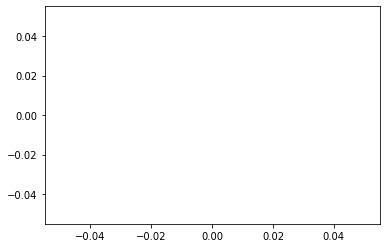

Solucion: [nan, nan] nan


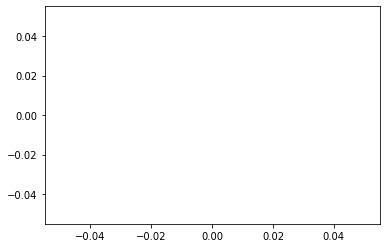

Solucion: [nan, nan] nan


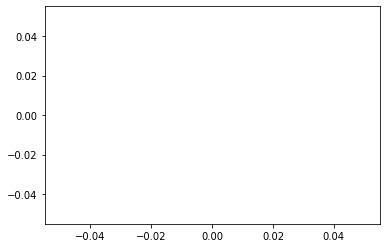

Solucion: [nan, nan] nan


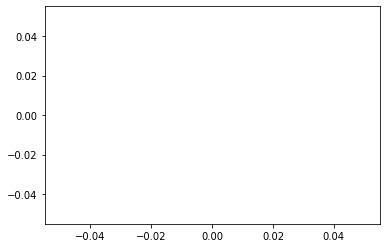

Solucion: [nan, nan] nan


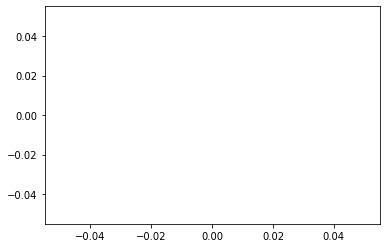

Solucion: [nan, nan] nan


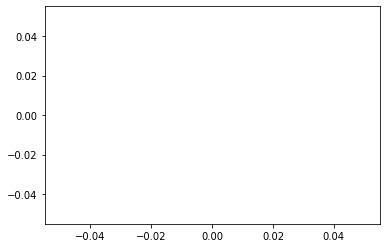

Solucion: [nan, nan] nan


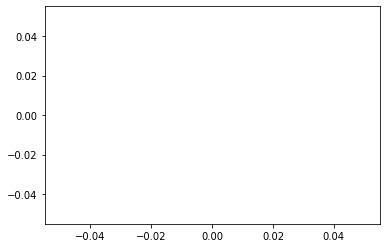

Solucion: [nan, nan] nan


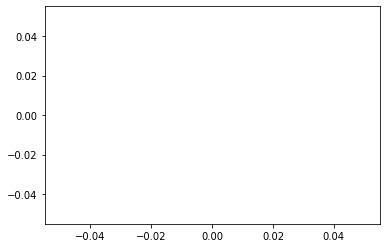

Solucion: [nan, nan] nan


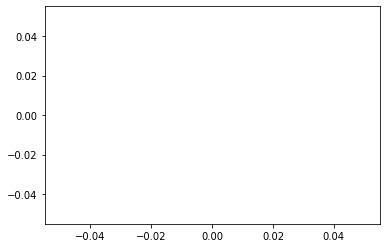

Solucion: [nan, nan] nan


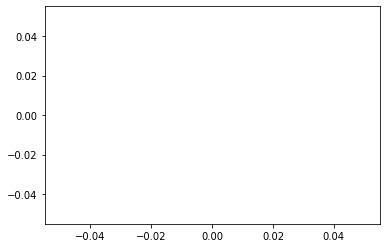

Solucion: [nan, nan] nan


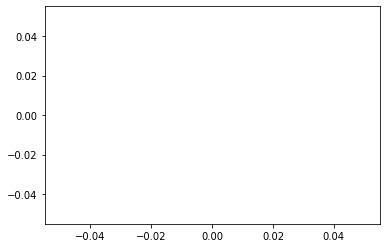

Solucion: [nan, nan] nan


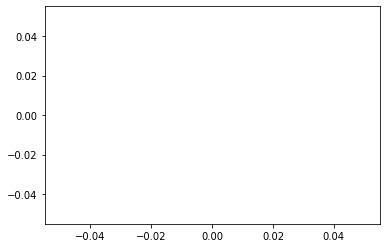

Solucion: [nan, nan] nan


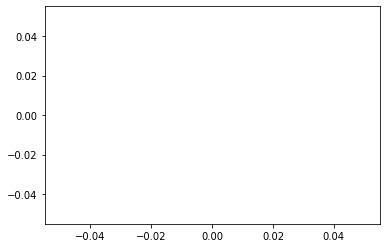

Solucion: [nan, nan] nan


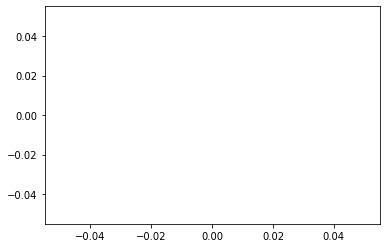

Solucion: [nan, nan] nan


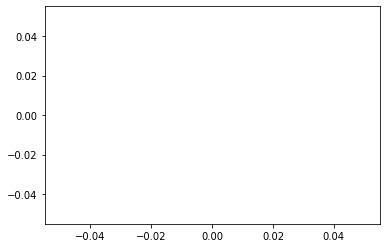

Solucion: [nan, nan] nan


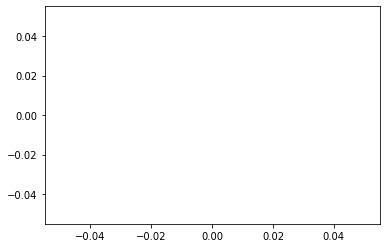

Solucion: [nan, nan] nan


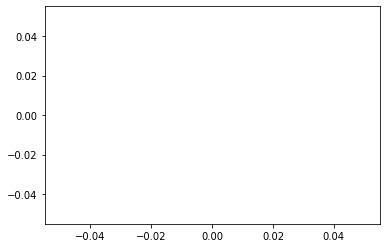

Solucion: [nan, nan] nan


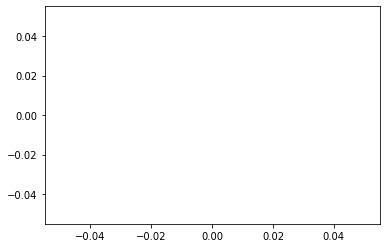

Solucion: [nan, nan] nan


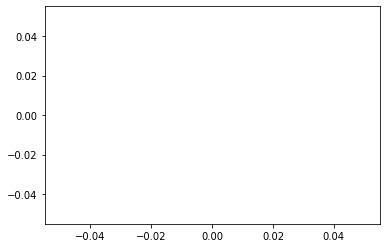

Solucion: [nan, nan] nan


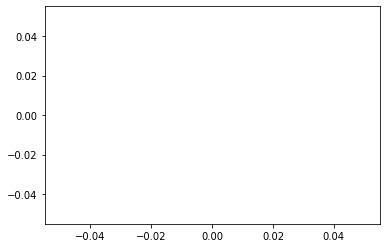

Solucion: [nan, nan] nan


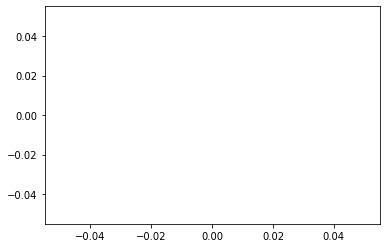

Solucion: [nan, nan] nan


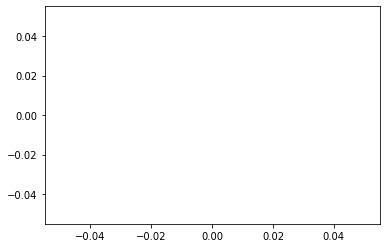

Solucion: [nan, nan] nan


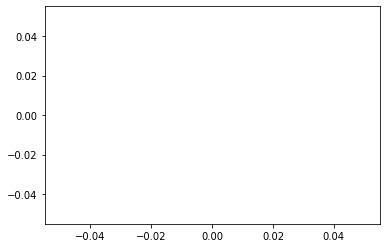

Solucion: [nan, nan] nan


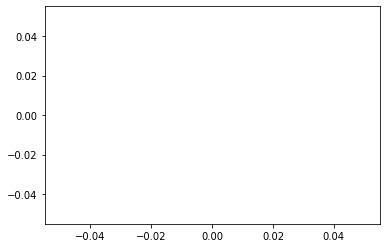

Solucion: [nan, nan] nan


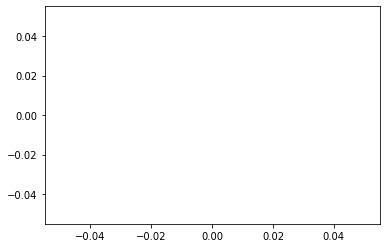

Solucion: [nan, nan] nan


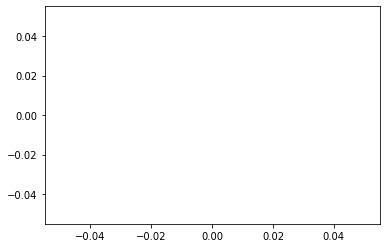

Solucion: [nan, nan] nan


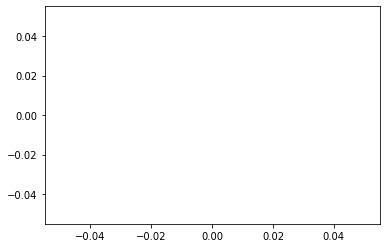

Solucion: [nan, nan] nan


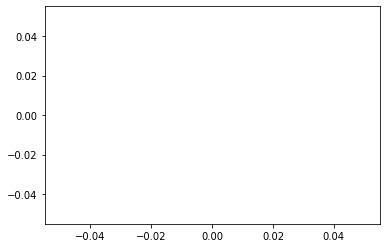

Solucion: [nan, nan] nan


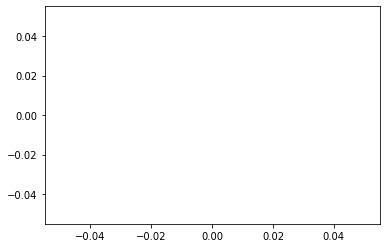

Solucion: [nan, nan] nan


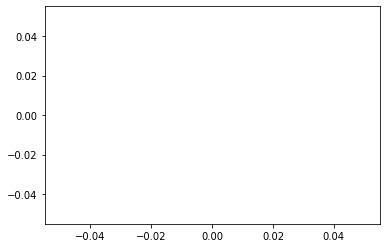

Solucion: [nan, nan] nan


In [46]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
#El descenso de gradiente es un proceso de iteracion mediante el cual se busca que una funcion converja hacia el min
#Entre sus aplicaciones, esta la de redes neuronales. Se usa el DG para ajustar los parametros de la red

f=lambda x: x[0]**2+x[1]**2  #f
df=lambda x:[2*x[0],2*x[1]]   #df

resolucion=50
rango=2.5
x=np.linspace(-rango,rango,resolucion)
y=np.linspace(-rango,rango,resolucion)
z=np.zeros((resolucion,resolucion))


for ix,x1 in enumerate(x):
  for iy, y1 in enumerate(y):
    z[iy,ix]=f([x1,y1])

plt.contourf(x,y,z,resolucion)
plt.colorbar()

#se genera pto aleat

p=[random.uniform(-2,2), random.uniform(-2,2)]
plt.plot(p[0],p[1],"o",c="white")

#tasa aprendizaje
ta=1

for _ in range(500):
  grad=df(p)
  p[0],p[1]=p[0] - ta*grad[0],p[1] - ta*grad[1]
  plt.plot(p[0],p[1],"o",c="red")

  plt.plot(p[0],p[1],"o",c="green")
  plt.show()
  print("Solucion:", p, f(p))

  #definicion de la func

  f=lambda xf: np.sin(1/2*xf[0]**2 - 1/4*xf[1]**2+3)*np.cos(2*xf[0]+1-np.e**xf[1])

  def df(punto):
    h=0.01
    tp=np.copy(punto)
    grad=np.zeros(2)
    for it,th in enumerate(punto):
      tp[it]=tp[it]+h
      grad[it]=(f(tp)-f(punto))/h
    return grad

#invocacion y test
#df((1,2))


